<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Genomes" data-toc-modified-id="Genomes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Genomes</a></span></li><li><span><a href="#Antismash" data-toc-modified-id="Antismash-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Antismash</a></span><ul class="toc-item"><li><span><a href="#Re-running-failed-jobs" data-toc-modified-id="Re-running-failed-jobs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Re-running failed jobs</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Totals" data-toc-modified-id="Totals-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Totals</a></span></li><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>By taxonomy</a></span><ul class="toc-item"><li><span><a href="#Firmicutes" data-toc-modified-id="Firmicutes-5.2.2.1"><span class="toc-item-num">5.2.2.1&nbsp;&nbsp;</span>Firmicutes</a></span></li></ul></li><li><span><a href="#By-taxonomy,-ave.-per-genome" data-toc-modified-id="By-taxonomy,-ave.-per-genome-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>By taxonomy, ave. per genome</a></span><ul class="toc-item"><li><span><a href="#Highest-average-per-genome" data-toc-modified-id="Highest-average-per-genome-5.2.3.1"><span class="toc-item-num">5.2.3.1&nbsp;&nbsp;</span>Highest average per genome</a></span></li><li><span><a href="#Notes" data-toc-modified-id="Notes-5.2.3.2"><span class="toc-item-num">5.2.3.2&nbsp;&nbsp;</span>Notes</a></span></li></ul></li><li><span><a href="#Writing-table" data-toc-modified-id="Writing-table-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Writing table</a></span></li></ul></li></ul></li><li><span><a href="#--TODO--" data-toc-modified-id="--TODO---6"><span class="toc-item-num">6&nbsp;&nbsp;</span>--TODO--</a></span></li><li><span><a href="#DeepBGC" data-toc-modified-id="DeepBGC-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>DeepBGC</a></span><ul class="toc-item"><li><span><a href="#First-run" data-toc-modified-id="First-run-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>First run</a></span></li><li><span><a href="#Re-run-failed-jobs" data-toc-modified-id="Re-run-failed-jobs-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Re-run failed jobs</a></span></li><li><span><a href="#Re-run-failed-jobs" data-toc-modified-id="Re-run-failed-jobs-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Re-run failed jobs</a></span></li><li><span><a href="#Re-run-failed-jobs" data-toc-modified-id="Re-run-failed-jobs-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Re-run failed jobs</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-7.4.0.1"><span class="toc-item-num">7.4.0.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Stats" data-toc-modified-id="Stats-7.5.2"><span class="toc-item-num">7.5.2&nbsp;&nbsp;</span>Stats</a></span></li><li><span><a href="#RF-scores-for-each-product" data-toc-modified-id="RF-scores-for-each-product-7.5.3"><span class="toc-item-num">7.5.3&nbsp;&nbsp;</span>RF scores for each product</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Identify putative biosynthetic gene clusters in species-rep MAGs

# Var

In [1]:
# Dereplicated MAGs
MAG_dir = file.path('/ebio', 'abt3_projects', 'Georg_animal_feces', 'data',
                     'metagenome', 'multi-study', 'BioProjects', 'summary',
                     'LLMGA', 'wGeorgAnimal', 'drep-0.95')

# de-rep'd MAG metadata
MAG_meta_file = file.path(MAG_dir, 'drep-MAG_metadata.tsv')

# working dir
work_dir = file.path(MAG_dir, 'BGCs')


# params
conda_env = 'BGC'
threads = 8
workers = 100

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(doParallel)
library(LeyLabRMisc)

library(future)
library(future.batchtools)
library(future.apply)
options(future.wait.interval = 2.0)

In [4]:
make_dir(work_dir)
df.dims()

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs 


# Genomes

In [8]:
# genome fasta files
genome_files = list.files(file.path(MAG_dir, 'dereplicated_genomes'), '*.fa', full.names=TRUE)
genome_files = data.frame(fasta_file = genome_files,
                          base_in = basename(genome_files)) %>%
    mutate(binID = gsub('\\.fa$', '', base_in),
           taxon = gsub('\\.contigs\\.fa$', '', base_in),
           taxon = gsub('\\.', '_', taxon),
           AS_out_dir = file.path(work_dir, 'antismash_v5', taxon),
           dBGC_out_dir = file.path(work_dir, 'deepBGC', taxon))

genome_files

fasta_file                                                                                                                                                                                     
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa 
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa
⋮    ⋮                                                                                                                                                                                              
1521 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa      
1522 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X96_European_Hare__metabat2_high_PE.013.contigs.fa    
     base_in                                               
1    artificially_reared_1__metabat2_low_PE.002.contigs.fa 
2    artificially_reared_2__maxbin2_low_prob.006.contigs.fa
⋮    ⋮                                                     
1521 X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa      
1522 X96_European_Hare__metabat2_high_PE.013.contigs.fa    
     binID                                              
1    artificially_reared_1__metabat2_low_PE.002.contigs 
2    artificially_reared_2__maxbin2_low_prob.006.contigs
⋮    ⋮                                                  
1521 X95_Meadow_Viper__metabat2_low_PE.002.contigs      
1522 X96_European_Hare__metabat2_high_PE.013.contigs    
     taxon                                      
1    artificially_reared_1__metabat2_low_PE_002 
2    artificially_reared_2__maxbin2_low_prob_006
⋮    ⋮                                          
1521 X95_Meadow_Viper__metabat2_low_PE_002      
1522 X96_European_Hare__metabat2_high_PE_013    
     AS_out_dir                                                                                                                                                                       
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_002 
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006
⋮    ⋮                                                                                                                                                                                
1521 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/X95_Meadow_Viper__metabat2_low_PE_002      
1522 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/X96_European_Hare__metabat2_high_PE_013    
     dBGC_out_dir                                                                                                                                                                
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_002 
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__maxbin2_low_prob_006
⋮    ⋮                                                                                                                                                                           
1521 /ebio/abt3_p

In [7]:
# metadata
MAG_meta = read.delim(MAG_meta_file, sep='\t')
MAG_meta

binID                                              
1    artificially_reared_1__metabat2_low_PE.002.contigs 
2    artificially_reared_2__maxbin2_low_prob.006.contigs
⋮    ⋮                                                  
1521 X95_Meadow_Viper__metabat2_low_PE.002.contigs      
1522 X96_European_Hare__metabat2_high_PE.013.contigs    
     fasta.x                                                                                                                                                                                         
1    /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa 
2    /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa
⋮    ⋮                                                                                                                                                                                               
1521 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa      
1522 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X96_European_Hare__metabat2_high_PE.013.contigs.fa    
     Marker.lineage                  X..genomes X..markers X..marker.sets
1    o__Bacteroidales (UID2657)      160        491        268           
2    k__Bacteria (UID2569)           434        278        186           
⋮    ⋮                               ⋮          ⋮          ⋮             
1521 f__Enterobacteriaceae (UID5124) 134        1172       336           
1522 o__Clostridiales (UID1212)      172         263       149           
     Completeness Contamination Strain.heterogeneity Genome.size..bp. ⋯
1    92.92        3.00          28.57                3388189          ⋯
2    88.60        1.11          50.00                2174315          ⋯
⋮    ⋮            ⋮             ⋮                    ⋮                ⋱
1521 89.06        0.94          58.33                3738913          ⋯
1522 93.83        1.45           0.00                2554075          ⋯
     closest_placement_taxonomy                                                                                                           
1    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445          
2    N/A                                                                                                                                  
⋮    ⋮                                                                                                                                    
1521 d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter freundii
1522 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UBA5446;s__UBA5446 sp002427465                   
     closest_placement_ani closest_placement_af
1    85.72                 0.61                
2    N/A                   N/A                 
⋮    ⋮                     ⋮                   
1521 98.83                 0.94                
1522 76.48                 0.13                
     pplacer_taxonomy                                                                                                 
1    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__               
2    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__                         
⋮    ⋮                                                                                                                
1

In [9]:
# table join
genome_files = genome_files %>%
    inner_join(MAG_meta, c('binID')) 

genome_files

Warning message:
“Column `binID` joining character vector and factor, coercing into character vector”


fasta_file                                                                                                                                                                                     
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa 
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa
⋮    ⋮                                                                                                                                                                                              
1521 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa      
1522 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X96_European_Hare__metabat2_high_PE.013.contigs.fa    
     base_in                                               
1    artificially_reared_1__metabat2_low_PE.002.contigs.fa 
2    artificially_reared_2__maxbin2_low_prob.006.contigs.fa
⋮    ⋮                                                     
1521 X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa      
1522 X96_European_Hare__metabat2_high_PE.013.contigs.fa    
     binID                                              
1    artificially_reared_1__metabat2_low_PE.002.contigs 
2    artificially_reared_2__maxbin2_low_prob.006.contigs
⋮    ⋮                                                  
1521 X95_Meadow_Viper__metabat2_low_PE.002.contigs      
1522 X96_European_Hare__metabat2_high_PE.013.contigs    
     taxon                                      
1    artificially_reared_1__metabat2_low_PE_002 
2    artificially_reared_2__maxbin2_low_prob_006
⋮    ⋮                                          
1521 X95_Meadow_Viper__metabat2_low_PE_002      
1522 X96_European_Hare__metabat2_high_PE_013    
     AS_out_dir                                                                                                                                                                       
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_002 
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006
⋮    ⋮                                                                                                                                                                                
1521 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/X95_Meadow_Viper__metabat2_low_PE_002      
1522 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/X96_European_Hare__metabat2_high_PE_013    
     dBGC_out_dir                                                                                                                                                                
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_002 
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__maxbin2_low_prob_006
⋮    ⋮                                                                                                                                                                           
1521 /ebio/abt3_p

# Antismash

In [8]:
D = file.path(work_dir, 'antismash_v5')
make_dir(D)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5 


In [9]:
antismash_cmd = function(in_file, out_dir, cpus=8){
    params = '--cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal'
    exe_path = '--executable-paths meme=/ebio/abt3_projects/software/bin/meme'
    db = '--databases /ebio/abt3_projects/databases_no-backup/antismash/v5/'
    cmd = 'antismash --cpus {cpus} {params} {exe_path} {db} --output-dir {out_dir} {in_file}'
    cmd = glue::glue(cmd, cpus=8, params=params, exe_path=exe_path, 
                     db=db, out_dir=out_dir, in_file=in_file)
    return(cmd)
}

cmds = mapply(antismash_cmd, genome_files$fasta_file, genome_files$AS_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 1522


[1] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_1__metabat2_low_PE_002 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa"  
[2] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa"

In [41]:
resources = list(h_rt = '00:59:00',
                 h_vmem = '4G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [42]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

ERROR: Error: BatchtoolsExpiration: Future ('<none>') expired (registry path /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.future/20191007_130759-J77RfY/batchtools_511424197).. The last few lines of the logged output:
### [bt]: Starting calculation of 1 jobs
### [bt]: Setting working directory to '/ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal'
Loading required package: methods
### [bt]: Memory measurement disabled
### [bt]: Starting job [batchtools job.id=1]
### [bt]: Setting seed to 1 ...


## Re-running failed jobs

In [44]:
# directories with output
complete = list.files(file.path(work_dir, 'antismash_v5'), 'index.html', 
                      full.names=TRUE, recursive=TRUE) %>% dirname %>%
    gsub('/+', '/', .)
complete %>% length %>% print

[1] 1471


In [46]:
# redo genomes
genome_files_f = genome_files %>%
    filter(!AS_out_dir %in% complete)

# status
genome_files_f %>% dfhead

[1] 51 61


fasta_file                                                                                                                                                                                                           
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE.013.contigs.fa
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE.009.contigs.fa 
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE.013.contigs.fa 
  base_in                                                                     
1 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE.013.contigs.fa
2 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE.009.contigs.fa 
3 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE.013.contigs.fa 
  binID                                                                    
1 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE.013.contigs
2 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE.009.contigs 
3 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE.013.contigs 
  taxon                                                            
1 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE_013
2 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE_009 
3 Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE_013 
  AS_out_dir                                                                                                                                                                                             
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE_013
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE_009 
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE_013 
  dBGC_out_dir                                                                                                                                                                                      
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE_013
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE_009 
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE_013 
  fasta.x                                                                                                                                                                                                               
1 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE.013.contigs.fa
2 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE.009.contigs.fa 

In [47]:
cmds = mapply(antismash_cmd, genome_files_f$fasta_file, genome_files_f$AS_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 51


[1] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE_013 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_high_PE.013.contigs.fa"
[2] "antismash --cpus 8 --cb-knownclusters --cb-subclusters --asf --genefinding-tool prodigal --executable-paths meme=/ebio/abt3_projects/software/bin/meme --databases /ebio/abt3_projects/databases_no-backup/antismash/v5/ --output-dir /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE_009 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE.009.contigs.fa"

In [48]:
resources = list(h_rt = '06:00:00',
                 h_vmem = '6G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [49]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

[1] 51

## Summary

In [5]:
# getting products for all gbk "region" files
cmd = "find {dir} -name '*region*.gbk' | xargs grep 'product=' | sort -u | perl -pe 's/gbk: +/gbk:\t/g'"
cmd = glue::glue(cmd, dir=file.path(work_dir, 'antismash_v5'))
ret = bash_job(cmd, conda_env=conda_env)
ret %>% length

[1] 1986

In [6]:
# formatting
x = ret %>% strsplit('\t') %>% unlist
products = data.frame(gbk_file = gsub(':$', '', x[1:length(x) %% 2 == 1]),
                      product = gsub('/product=|"', '', x[1:length(x) %% 2 == 0])) %>%
    mutate(taxon = sapply(gbk_file, function(x) basename(dirname(as.character(x)))),
           product = product %>% as.character)
products

gbk_file                                                                                                                                                                                                        
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006/c00016_artific...region001.gbk
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006/c00086_artific...region001.gbk
⋮    ⋮                                                                                                                                                                                                               
1985 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/X95_Meadow_Viper__metabat2_low_PE_002/c00181_X95_Mea...region001.gbk      
1986 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/X96_European_Hare__metabat2_high_PE_013/c00008_X96_Eur...region001.gbk    
     product      taxon                                      
1    arylpolyene  artificially_reared_2__maxbin2_low_prob_006
2    arylpolyene  artificially_reared_2__maxbin2_low_prob_006
⋮    ⋮            ⋮                                          
1985 NRPS         X95_Meadow_Viper__metabat2_low_PE_002      
1986 sactipeptide X96_European_Hare__metabat2_high_PE_013

In [10]:
# joining with metadata
products = products %>%
    inner_join(genome_files, c('taxon')) 
products

gbk_file                                                                                                                                                                                                        
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006/c00016_artific...region001.gbk
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006/c00086_artific...region001.gbk
⋮    ⋮                                                                                                                                                                                                               
1985 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/X95_Meadow_Viper__metabat2_low_PE_002/c00181_X95_Mea...region001.gbk      
1986 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/X96_European_Hare__metabat2_high_PE_013/c00008_X96_Eur...region001.gbk    
     product      taxon                                      
1    arylpolyene  artificially_reared_2__maxbin2_low_prob_006
2    arylpolyene  artificially_reared_2__maxbin2_low_prob_006
⋮    ⋮            ⋮                                          
1985 NRPS         X95_Meadow_Viper__metabat2_low_PE_002      
1986 sactipeptide X96_European_Hare__metabat2_high_PE_013    
     fasta_file                                                                                                                                                                                     
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa
⋮    ⋮                                                                                                                                                                                              
1985 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa      
1986 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X96_European_Hare__metabat2_high_PE.013.contigs.fa    
     base_in                                               
1    artificially_reared_2__maxbin2_low_prob.006.contigs.fa
2    artificially_reared_2__maxbin2_low_prob.006.contigs.fa
⋮    ⋮                                                     
1985 X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa      
1986 X96_European_Hare__metabat2_high_PE.013.contigs.fa    
     binID                                              
1    artificially_reared_2__maxbin2_low_prob.006.contigs
2    artificially_reared_2__maxbin2_low_prob.006.contigs
⋮    ⋮                                                  
1985 X95_Meadow_Viper__metabat2_low_PE.002.contigs      
1986 X96_European_Hare__metabat2_high_PE.013.contigs    
     AS_out_dir                                                                                                                                                                       
1    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__maxbin2_low_prob_006
2    /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/w

### Totals

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/55b522fa87304e9e83438e32c3f74705.RDS 


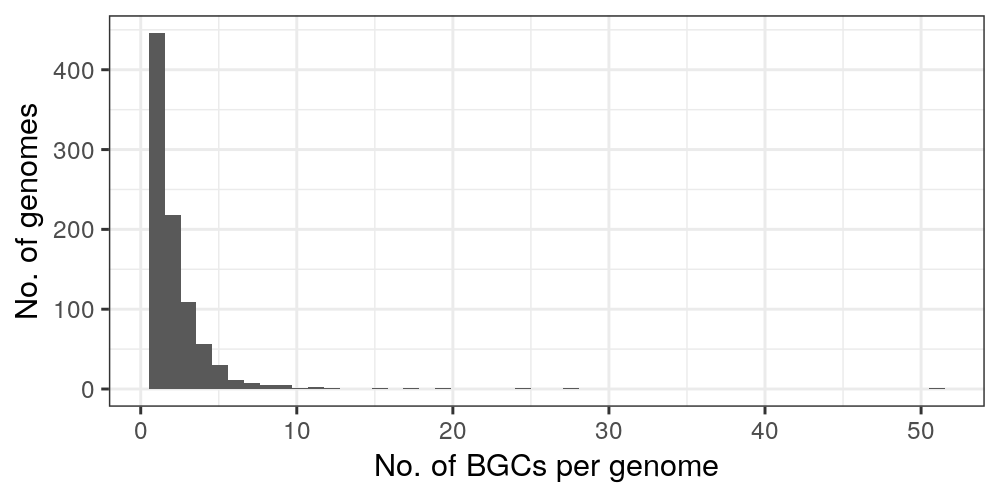

In [11]:
p = products %>%
    group_by(taxon) %>%
    summarize(n_BGCs = n()) %>%
    ungroup() %>%
    ggplot(aes(n_BGCs)) +
    geom_histogram(bins=50) +
    labs(x='No. of BGCs per genome', y='No. of genomes') +
    theme_bw()

p.dims(5,2.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/1c5229cd63feaeb19b47bb678a86538c.RDS 


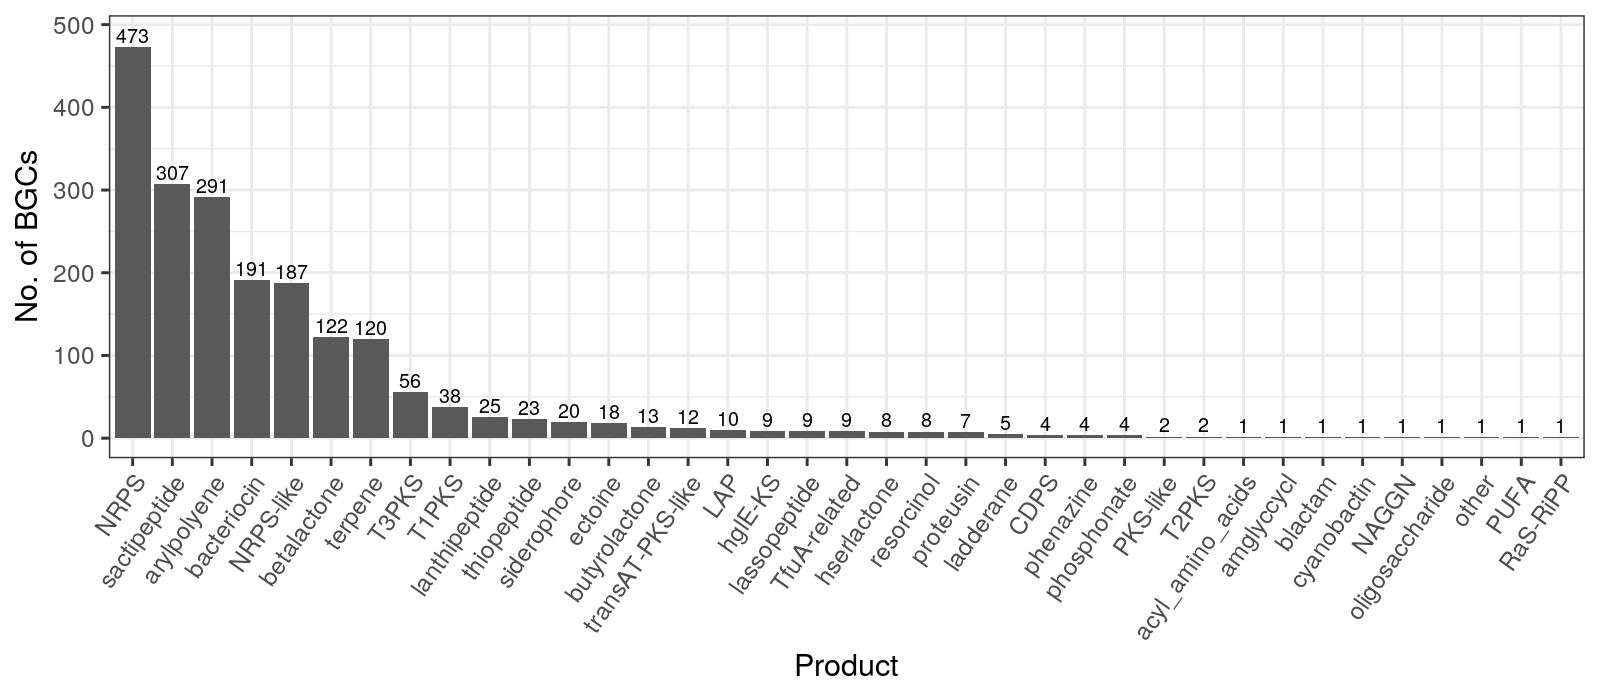

In [12]:
p = products %>%
    mutate(product = product %>% as.character) %>%
    group_by(product) %>%
    summarize(n_BGCs = n()) %>%
    ungroup() %>%
    mutate(product = product %>% reorder(-n_BGCs)) %>%
    ggplot(aes(product, n_BGCs)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=n_BGCs, y=n_BGCs + 14), size=2.5) + 
    labs(x='Product', y='No. of BGCs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(8,3.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/db65609b4bce1c3a14d54a2790acdd7e.RDS 


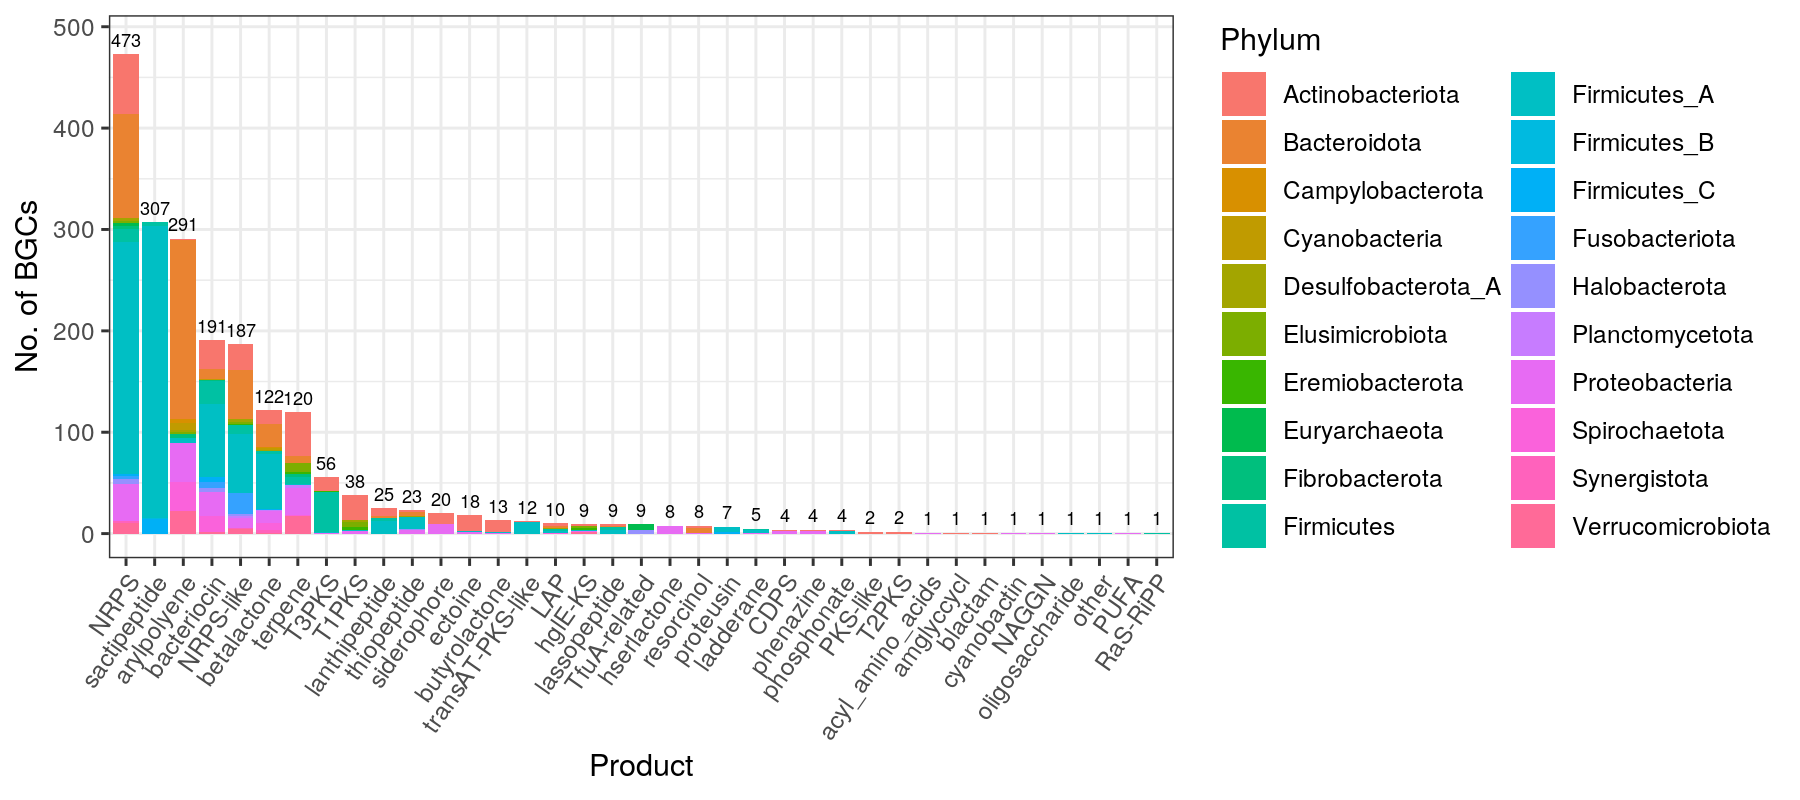

In [13]:
x = products %>%
    mutate(product = product %>% as.character) %>%
    group_by(product) %>%
    mutate(total_n_BGCs = n()) %>%
    group_by(product, Phylum, total_n_BGCs) %>%
    summarize(n_BGCs = n()) %>%
    ungroup() %>%
    mutate(product = product %>% reorder(-total_n_BGCs),
           Phylum = gsub('^p__', '', Phylum)) %>%
    filter(Phylum != '')

p = x %>%
    ggplot(aes(product, n_BGCs, fill=Phylum)) +
    geom_bar(stat='identity') +
    geom_text(data = x %>% distinct(product, total_n_BGCs) %>% mutate(Phylum = 'Actinobacteriota'),
              aes(label=total_n_BGCs, y=total_n_BGCs + 14), size=2.3) + 
    guides(fill=guide_legend(ncol=2)) + 
    labs(x='Product', y='No. of BGCs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(9,4)
Plot(p)

### By taxonomy

In [14]:
# formatting
products_s = products %>%
    dplyr::select(binID, product, Completeness, Contamination, X..contigs, 
                  Domain, Phylum, Class, Order, Family, Genus, Species,
                  closest_placement_ani) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num,
           has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) %>%
    group_by(product) %>%
    mutate(n_products = n()) %>%
    ungroup() 

products_s

binID                                               product     
1    artificially_reared_2__maxbin2_low_prob.006.contigs arylpolyene 
2    artificially_reared_2__maxbin2_low_prob.006.contigs arylpolyene 
⋮    ⋮                                                   ⋮           
1985 X95_Meadow_Viper__metabat2_low_PE.002.contigs       NRPS        
1986 X96_European_Hare__metabat2_high_PE.013.contigs     sactipeptide
     Completeness Contamination X..contigs Domain      Phylum           
1    88.6         1.11          131        d__Bacteria p__Bacteroidota  
2    88.6         1.11          131        d__Bacteria p__Bacteroidota  
⋮    ⋮            ⋮             ⋮          ⋮           ⋮                
1985 89.06        0.94          673        d__Bacteria p__Proteobacteria
1986 93.83        1.45          135        d__Bacteria p__Firmicutes_A  
     Class                  Order               Family               
1    c__Bacteroidia         o__Bacteroidales    f__Paludibacteraceae 
2    c__Bacteroidia         o__Bacteroidales    f__Paludibacteraceae 
⋮    ⋮                      ⋮                   ⋮                    
1985 c__Gammaproteobacteria o__Enterobacterales f__Enterobacteriaceae
1986 c__Clostridia          o__Oscillospirales  f__Oscillospiraceae  
     Genus          Species                 closest_placement_ani
1    g__            s__                     0                    
2    g__            s__                     0                    
⋮    ⋮              ⋮                       ⋮                    
1985 g__Citrobacter s__Citrobacter freundii 98.83                
1986 g__UBA5446     s__                     76.48                
     has_species_placement n_products
1    No match              291       
2    No match              291       
⋮    ⋮                     ⋮         
1985 ANI >= 95%            473       
1986 No match              307

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/ec9db93fed03ce1544061e4ad9bbd646.RDS 


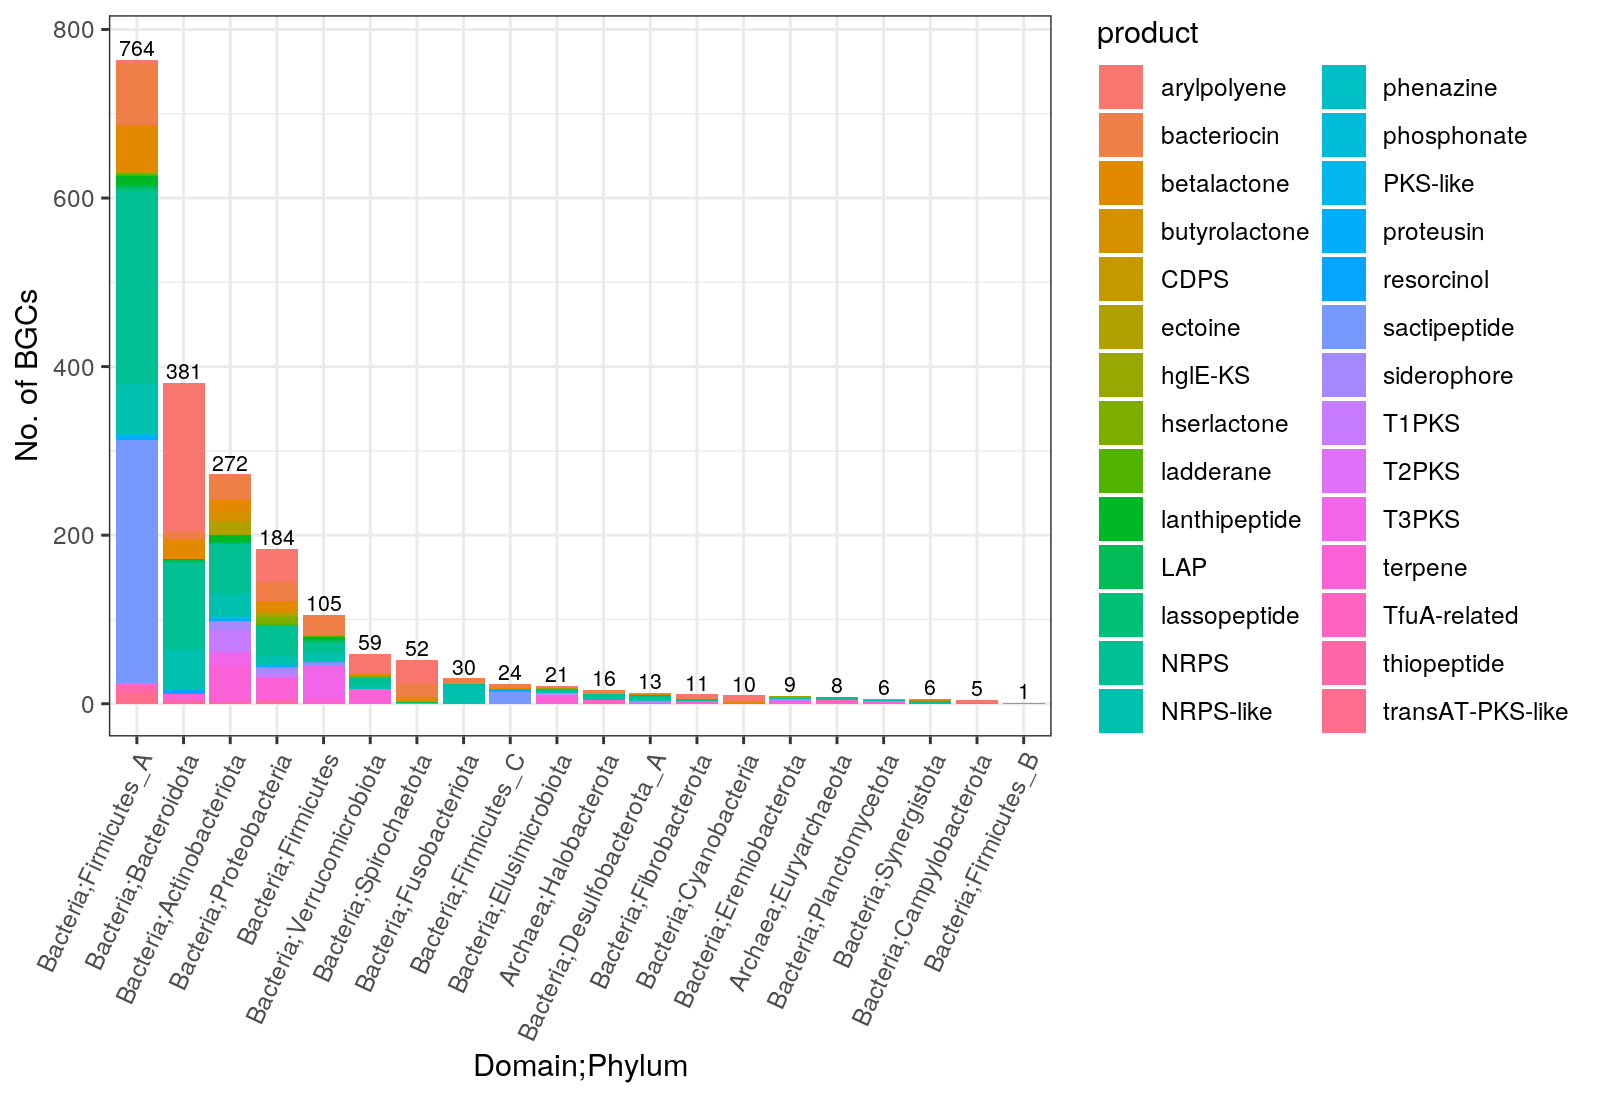

In [15]:
products_s_s = products_s %>%
    filter(n_products > 1) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') %>%
    group_by(Taxonomy, product) %>%
    summarize(n_BGCs = n()) %>%
    group_by(Taxonomy) %>%
    mutate(total_n_BGCs = sum(n_BGCs)) %>%
    ungroup() %>%
    mutate(Taxonomy = Taxonomy %>% reorder(-total_n_BGCs))

p = products_s_s %>%
    ggplot(aes(Taxonomy, n_BGCs, fill=product)) +
    geom_bar(stat='identity') +
    geom_text(data=products_s_s %>% distinct(Taxonomy, total_n_BGCs) %>% mutate(product = 'PKS-like'),
              aes(label=total_n_BGCs, y=total_n_BGCs+14), size=2.7) +
    labs(x='Domain;Phylum', y='No. of BGCs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
p.dims(8,5.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/45bffe500ecb48f72c74cde1980303ea.RDS 


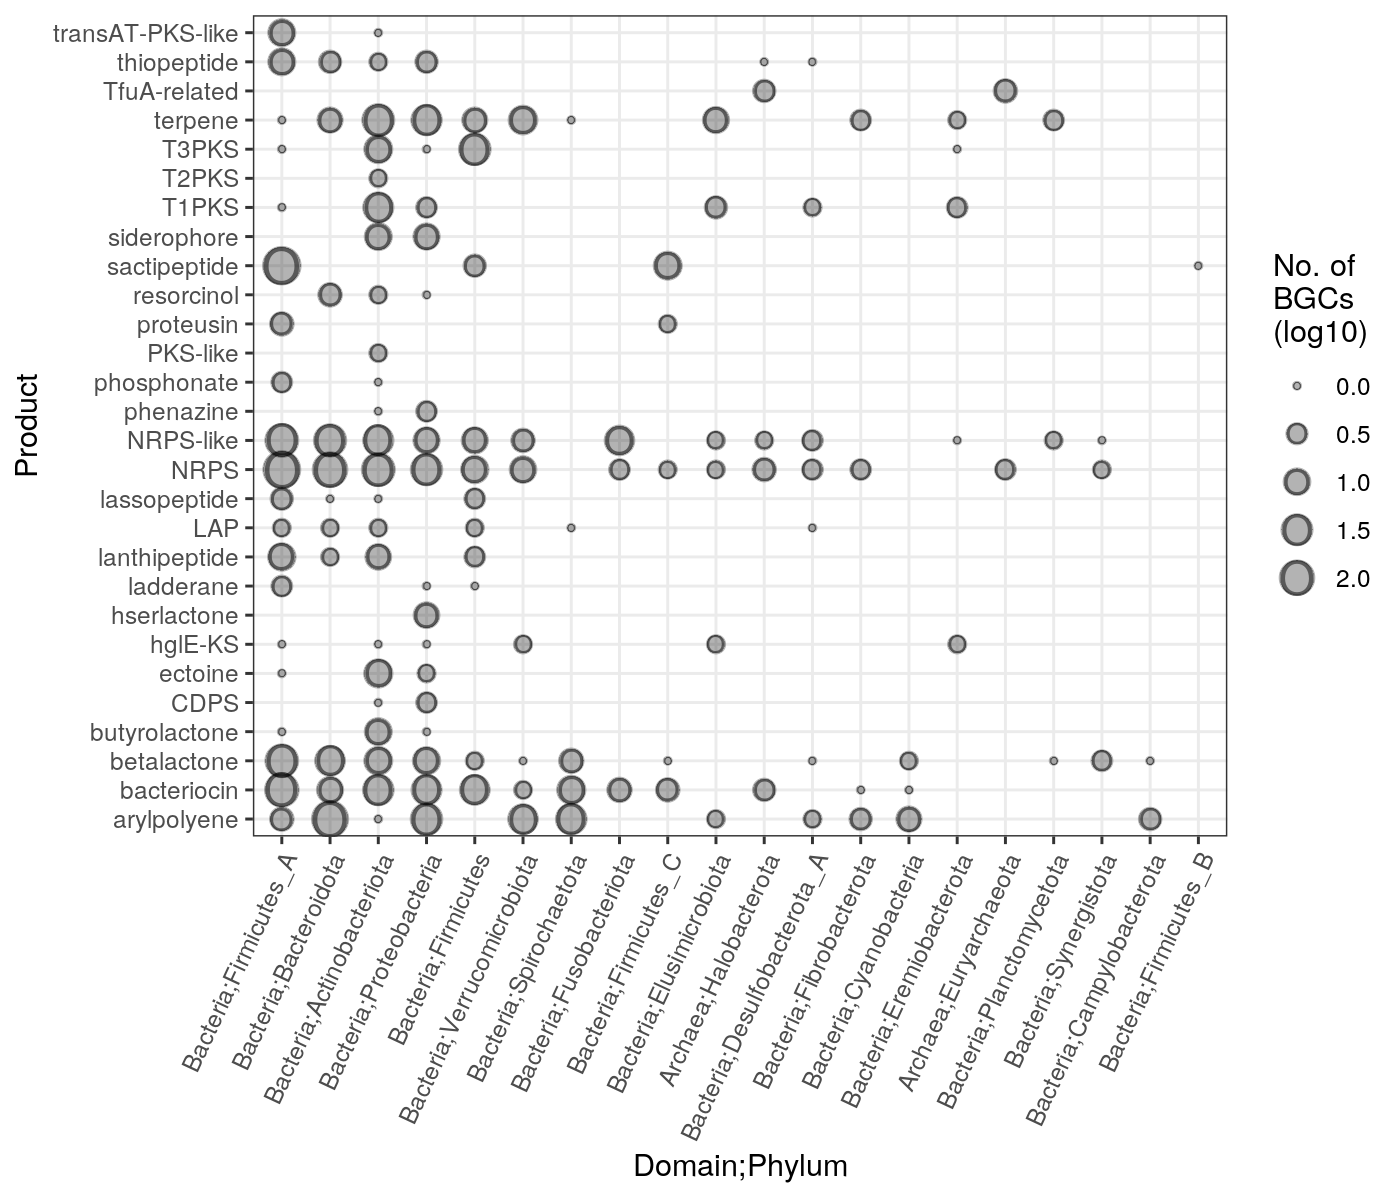

In [16]:
p = products_s_s %>%
    mutate(n_BGCs = n_BGCs %>% log10) %>%
    ggplot(aes(Taxonomy, product, size=n_BGCs)) +
    geom_point(alpha=0.3) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of\nBGCs\n(log10)') +
    labs(x='Domain;Phylum', y='Product') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
p.dims(7, 6)
Plot(p)

#### Firmicutes

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/410967b1691f37cfd3f0bc281a852cc5.RDS 


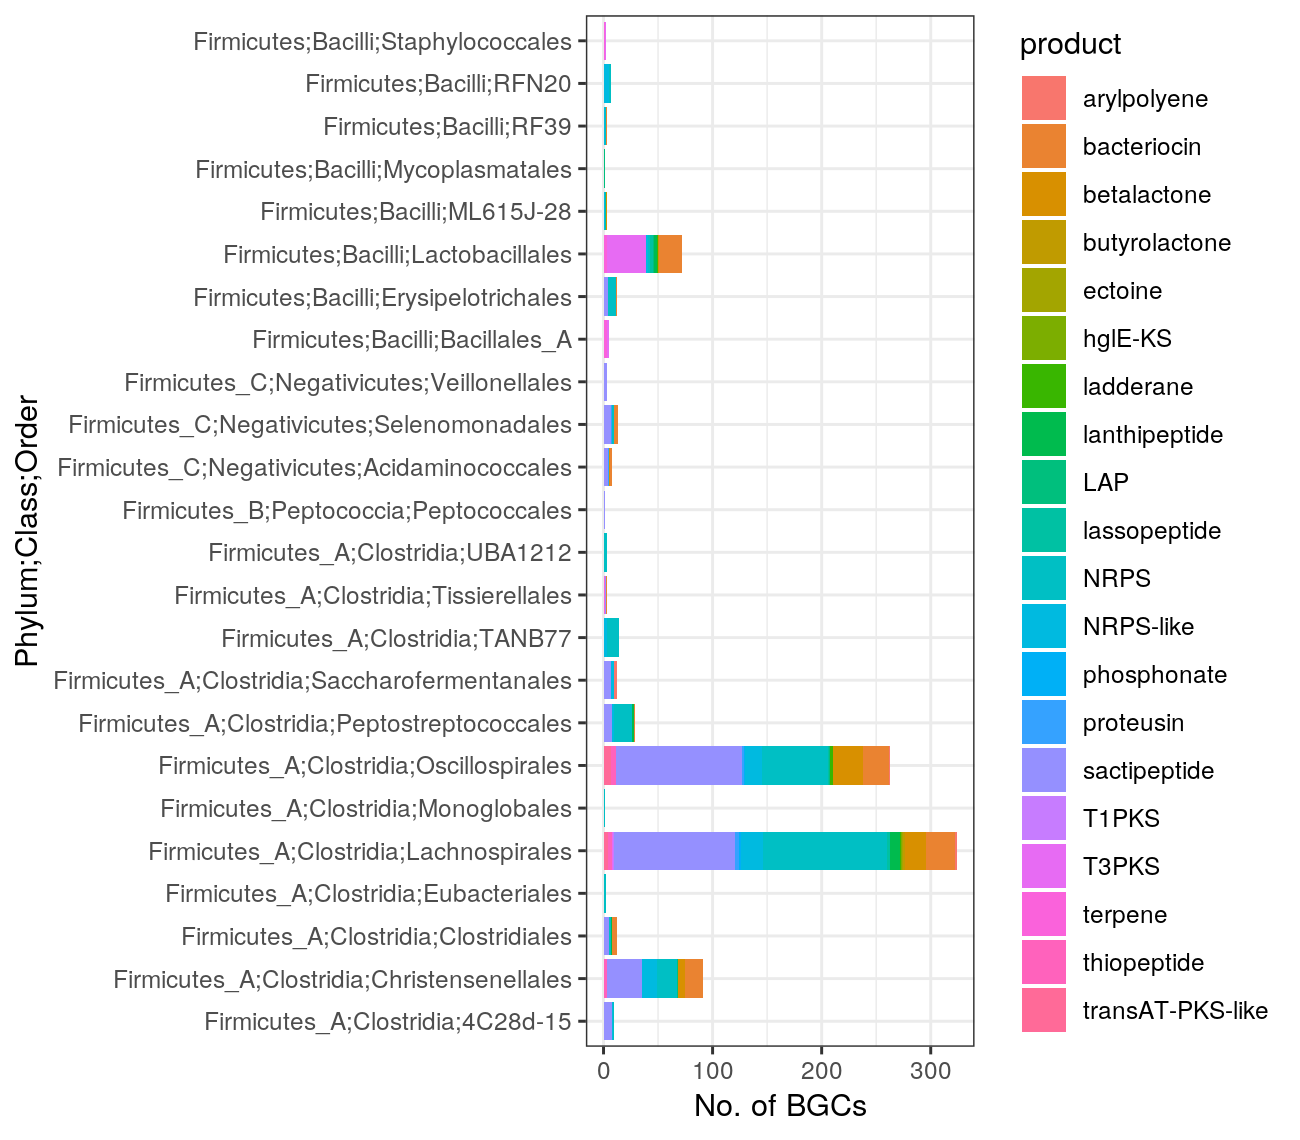

In [17]:
products_s_s = products_s %>%
    filter(n_products > 1) %>%
    filter(grepl('Firmicutes', Phylum)) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';') %>%
    group_by(Taxonomy, product) %>%
    summarize(n_BGCs = n()) %>%
    ungroup() 

p = products_s_s %>%
    ggplot(aes(Taxonomy, n_BGCs, fill=product)) +
    geom_bar(stat='identity') +
    labs(x='Phylum;Class;Order', y='No. of BGCs') +
    coord_flip() +
    theme_bw() 
 
p.dims(6.5,5.7)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/e2fe006e7c2eea8ca220624fe6bf2750.RDS 


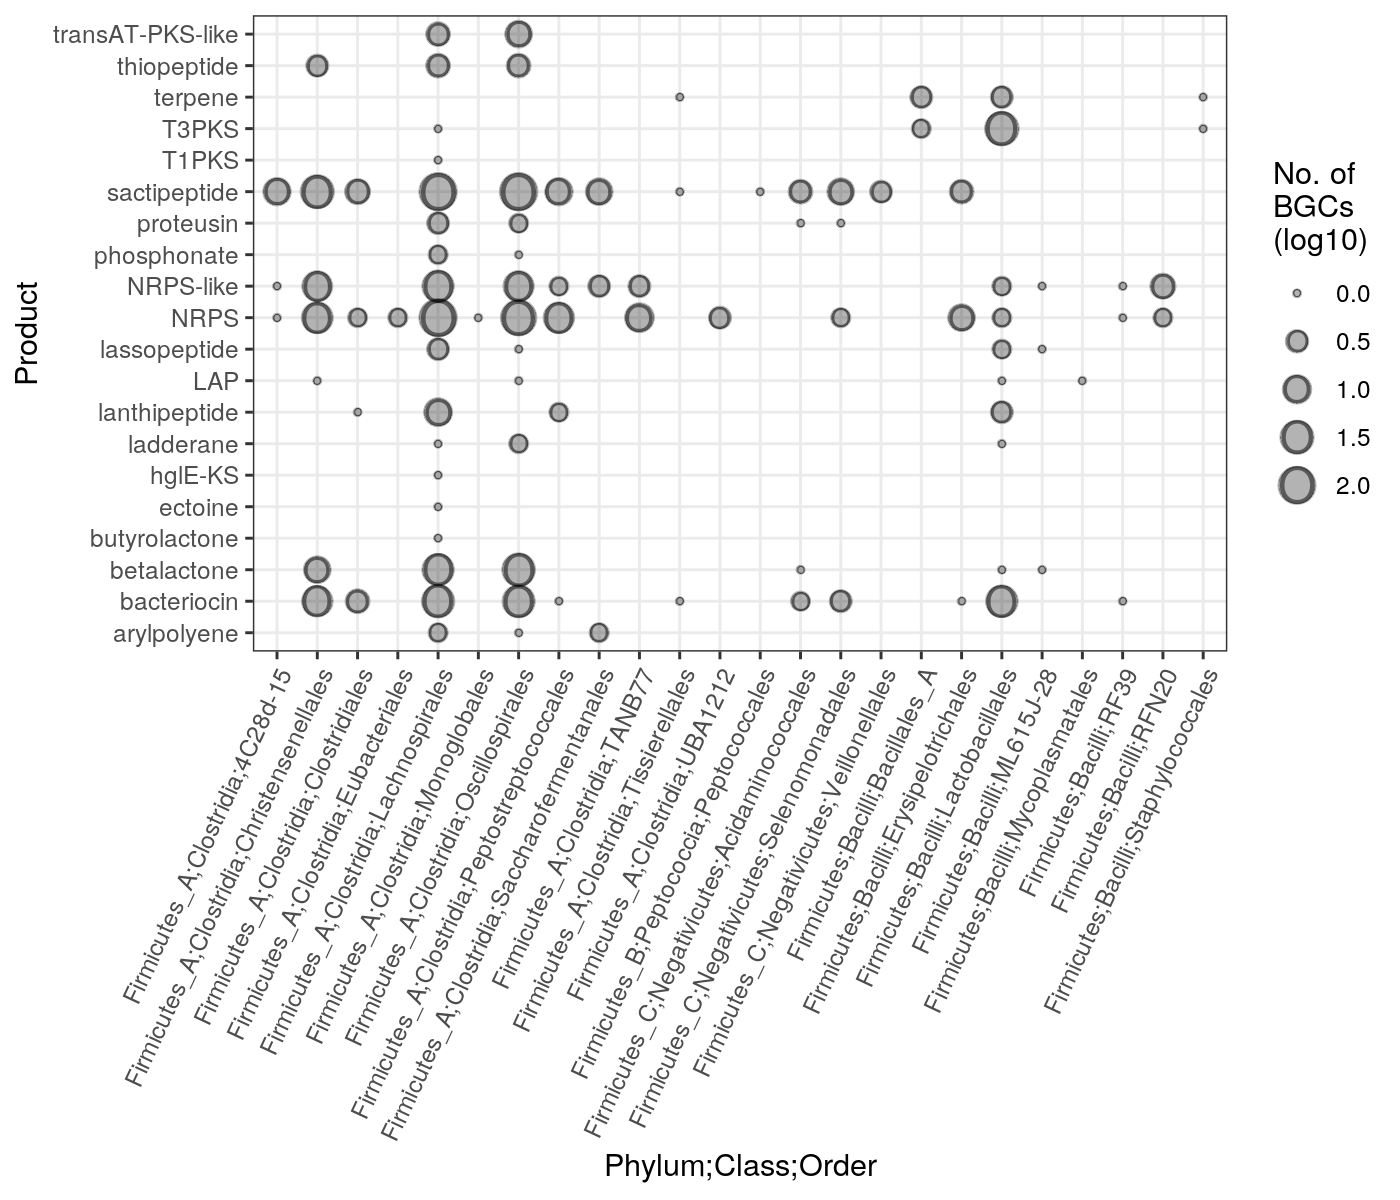

In [18]:
p = products_s_s %>%
    mutate(n_BGCs = n_BGCs %>% log10) %>%
    ggplot(aes(Taxonomy, product, size=n_BGCs)) +
    geom_point(alpha=0.3) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('No. of\nBGCs\n(log10)') +
    labs(x='Phylum;Class;Order', y='Product') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
p.dims(7, 6)
Plot(p)

### By taxonomy, ave. per genome

In [19]:
# average number of BGCs per genome
products_s_s  = products_s %>%
    group_by(Domain, Phylum) %>%
    mutate(n_MAGs = n_distinct(binID)) %>%
    ungroup() %>%
    #filter(n_products > 1) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') %>%
    group_by(binID) %>%
    mutate(n_BGCs = n()) %>%
    group_by(Taxonomy, n_MAGs) %>%
    summarize(n_BGCs = mean(n_BGCs)) %>%
    ungroup()
    
products_s_s %>%
    arrange(-n_BGCs)

Taxonomy                  n_MAGs n_BGCs  
1  Bacteria;Actinobacteriota 60     16.27737
2  Bacteria;Eremiobacterota   1      9.00000
⋮  ⋮                         ⋮      ⋮       
19 Bacteria;Campylobacterota 5      1       
20 Bacteria;Firmicutes_B     1      1

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/d750ad21987cb16b48f0d6fa0ae16d30.RDS 


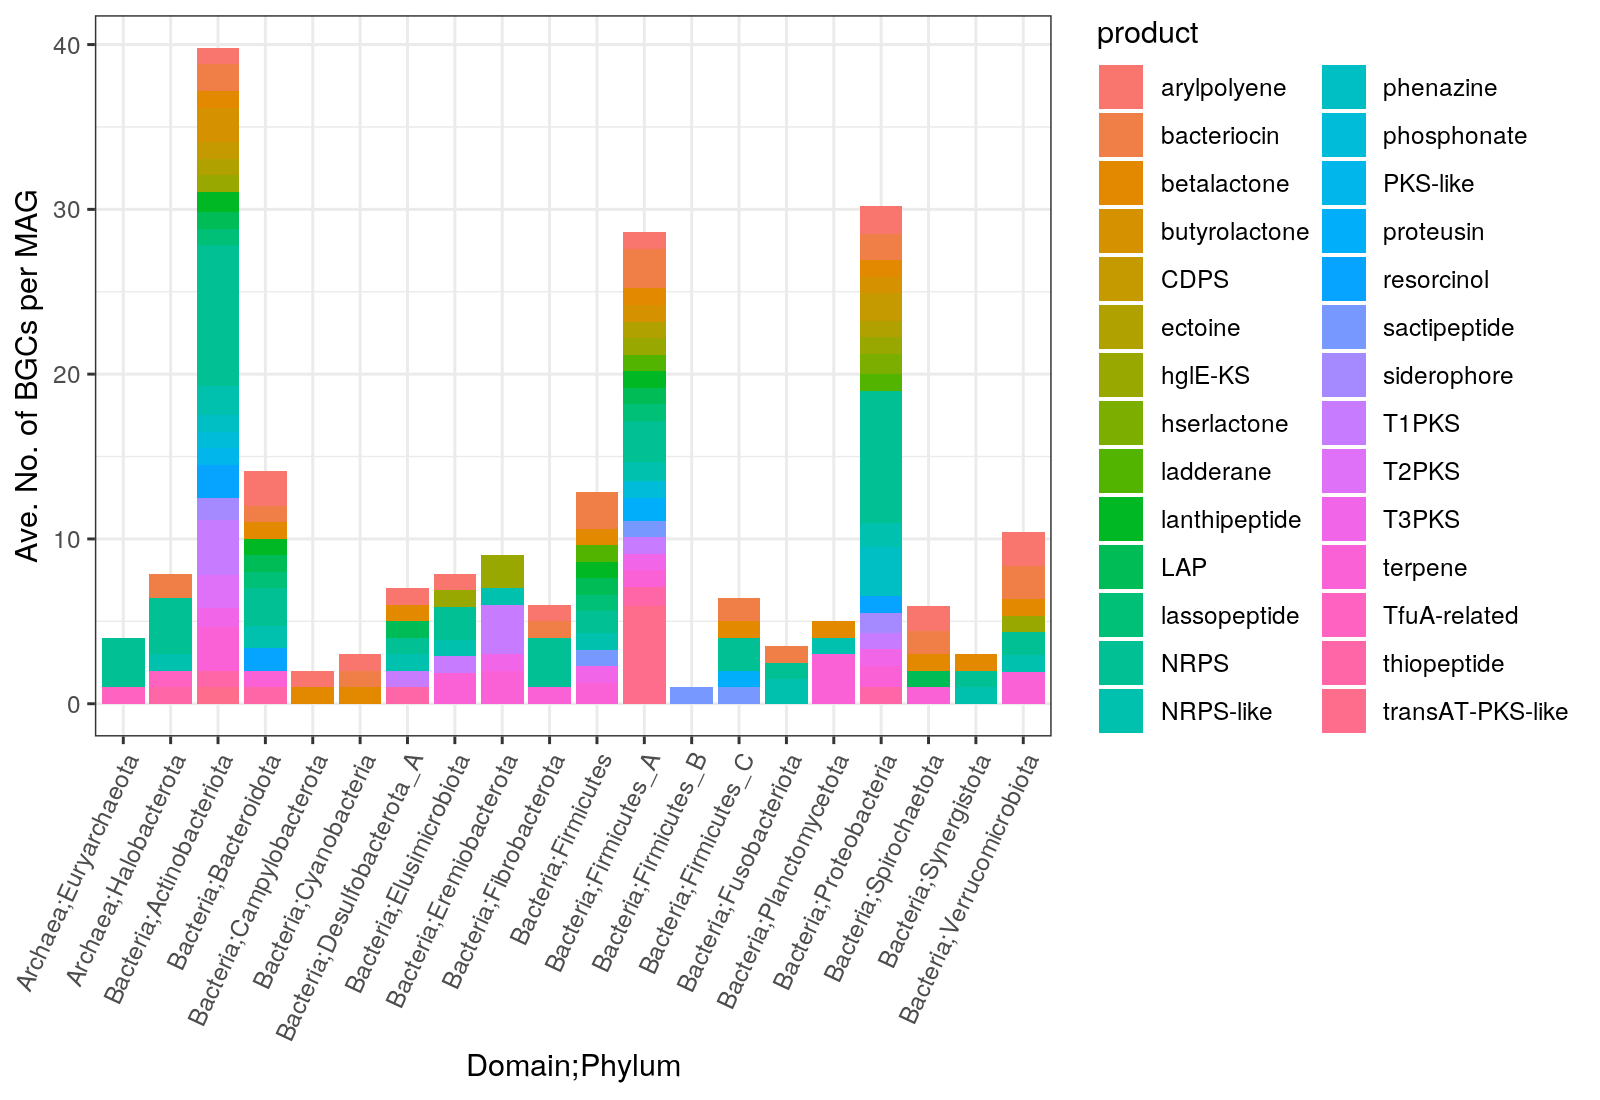

In [20]:
products_s_s = products_s %>%
    filter(n_products > 1) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') %>%
    group_by(binID, product) %>%
    mutate(n_BGCs = n()) %>%
    group_by(Taxonomy, product) %>%
    summarize(n_BGCs = mean(n_BGCs)) %>%
    ungroup() 

p = products_s_s %>%
    ggplot(aes(Taxonomy, n_BGCs, fill=product)) +
    geom_bar(stat='identity') +
    labs(x='Domain;Phylum', y='Ave. No. of BGCs per MAG') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
p.dims(8,5.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/056436eff2081e4718b6e2fda93fc7c8.RDS 


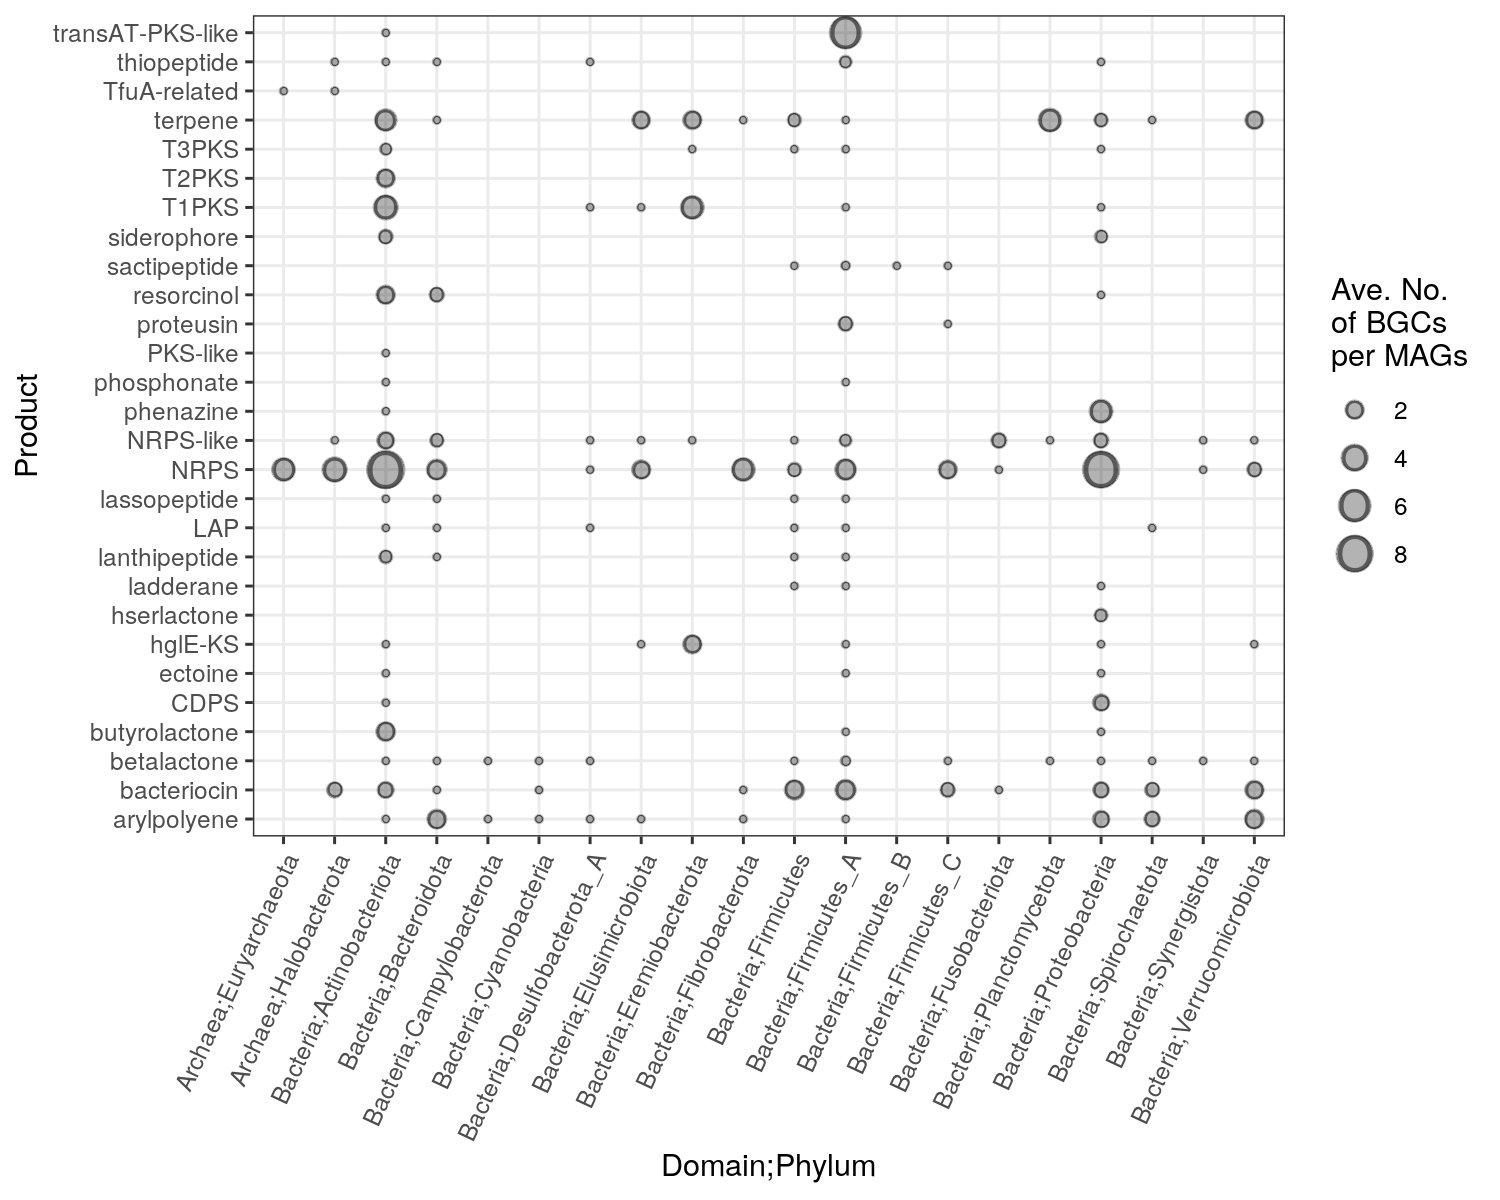

In [21]:
p = products_s_s %>%
    ggplot(aes(Taxonomy, product, size=n_BGCs)) +
    geom_point(alpha=0.3) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('Ave. No.\nof BGCs\nper MAGs') +
    labs(x='Domain;Phylum', y='Product') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
p.dims(7.5, 6)
Plot(p)

#### Highest average per genome

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/a3cdda24e27ed57c7a1c911c38007885.RDS 


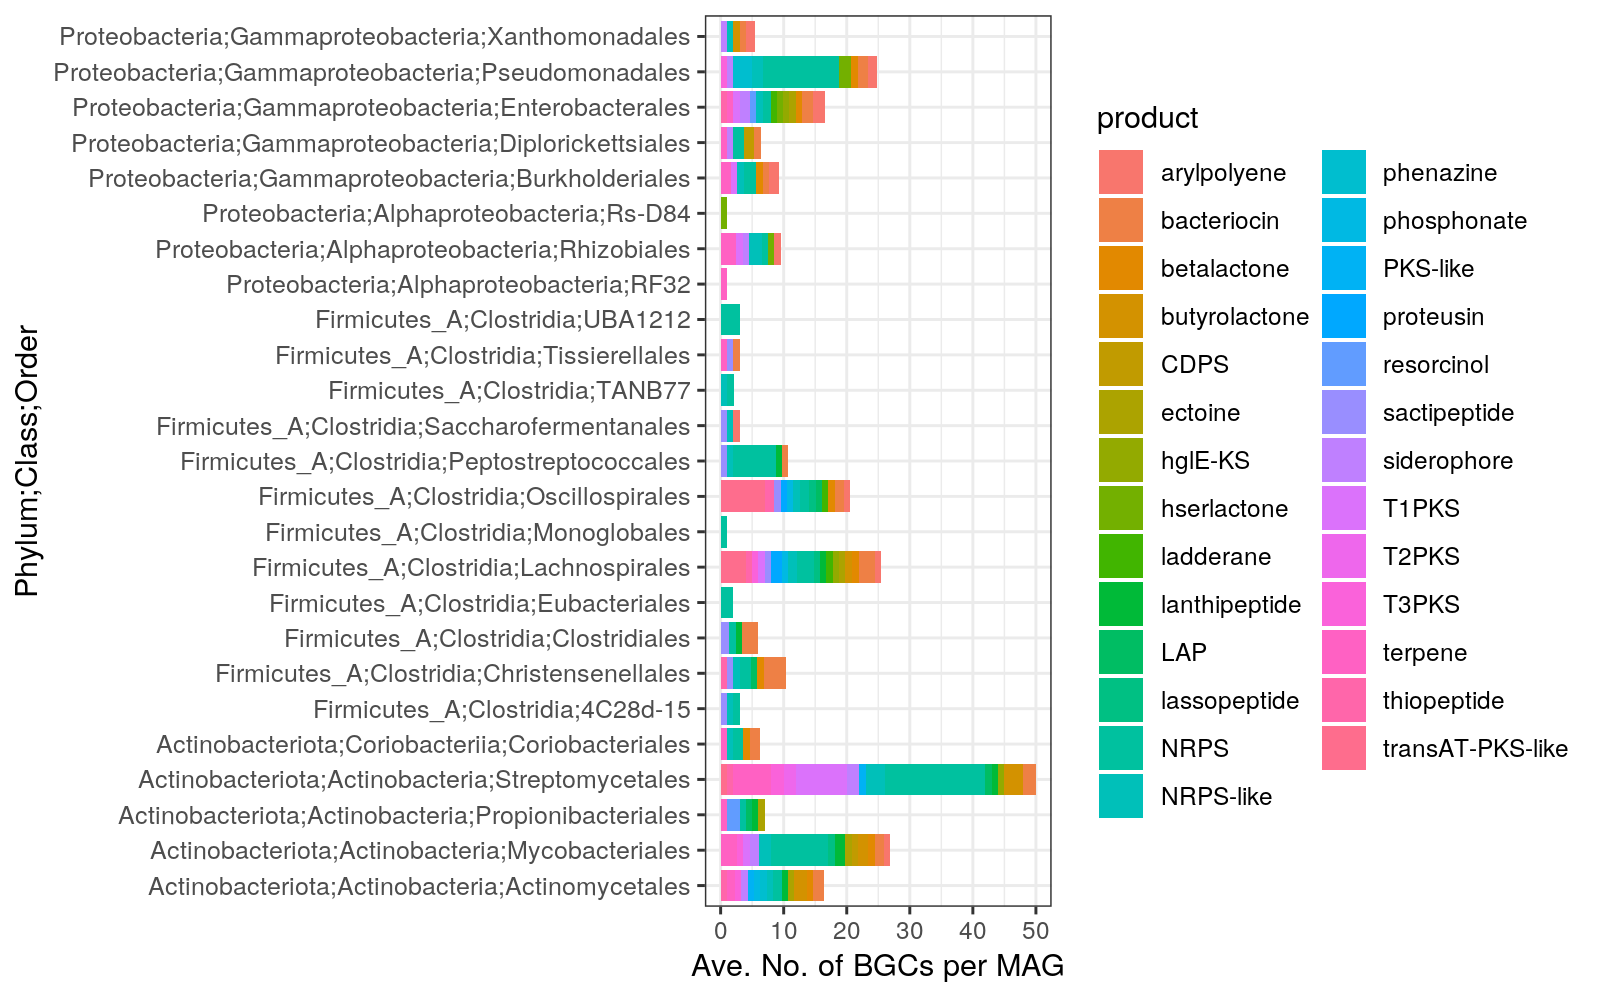

In [22]:
phyla_to_keep = c('Actinobacteriota', 'Firmicutes_A', 'Proteobacteria')

products_s_s = products_s %>%
    filter(n_products > 1) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    filter(Phylum %in% phyla_to_keep) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    group_by(binID, product) %>%
    mutate(n_BGCs = n()) %>%
    group_by(Taxonomy, Phylum, product) %>%
    summarize(n_BGCs = mean(n_BGCs)) %>%
    ungroup() 

p = products_s_s %>%
    ggplot(aes(Taxonomy, n_BGCs, fill=product)) +
    geom_bar(stat='identity') +
    labs(x='Phylum;Class;Order', y='Ave. No. of BGCs per MAG') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9)
    )
 
p.dims(8,5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/e55d7d93172308353a2a443fa4060baa.RDS 


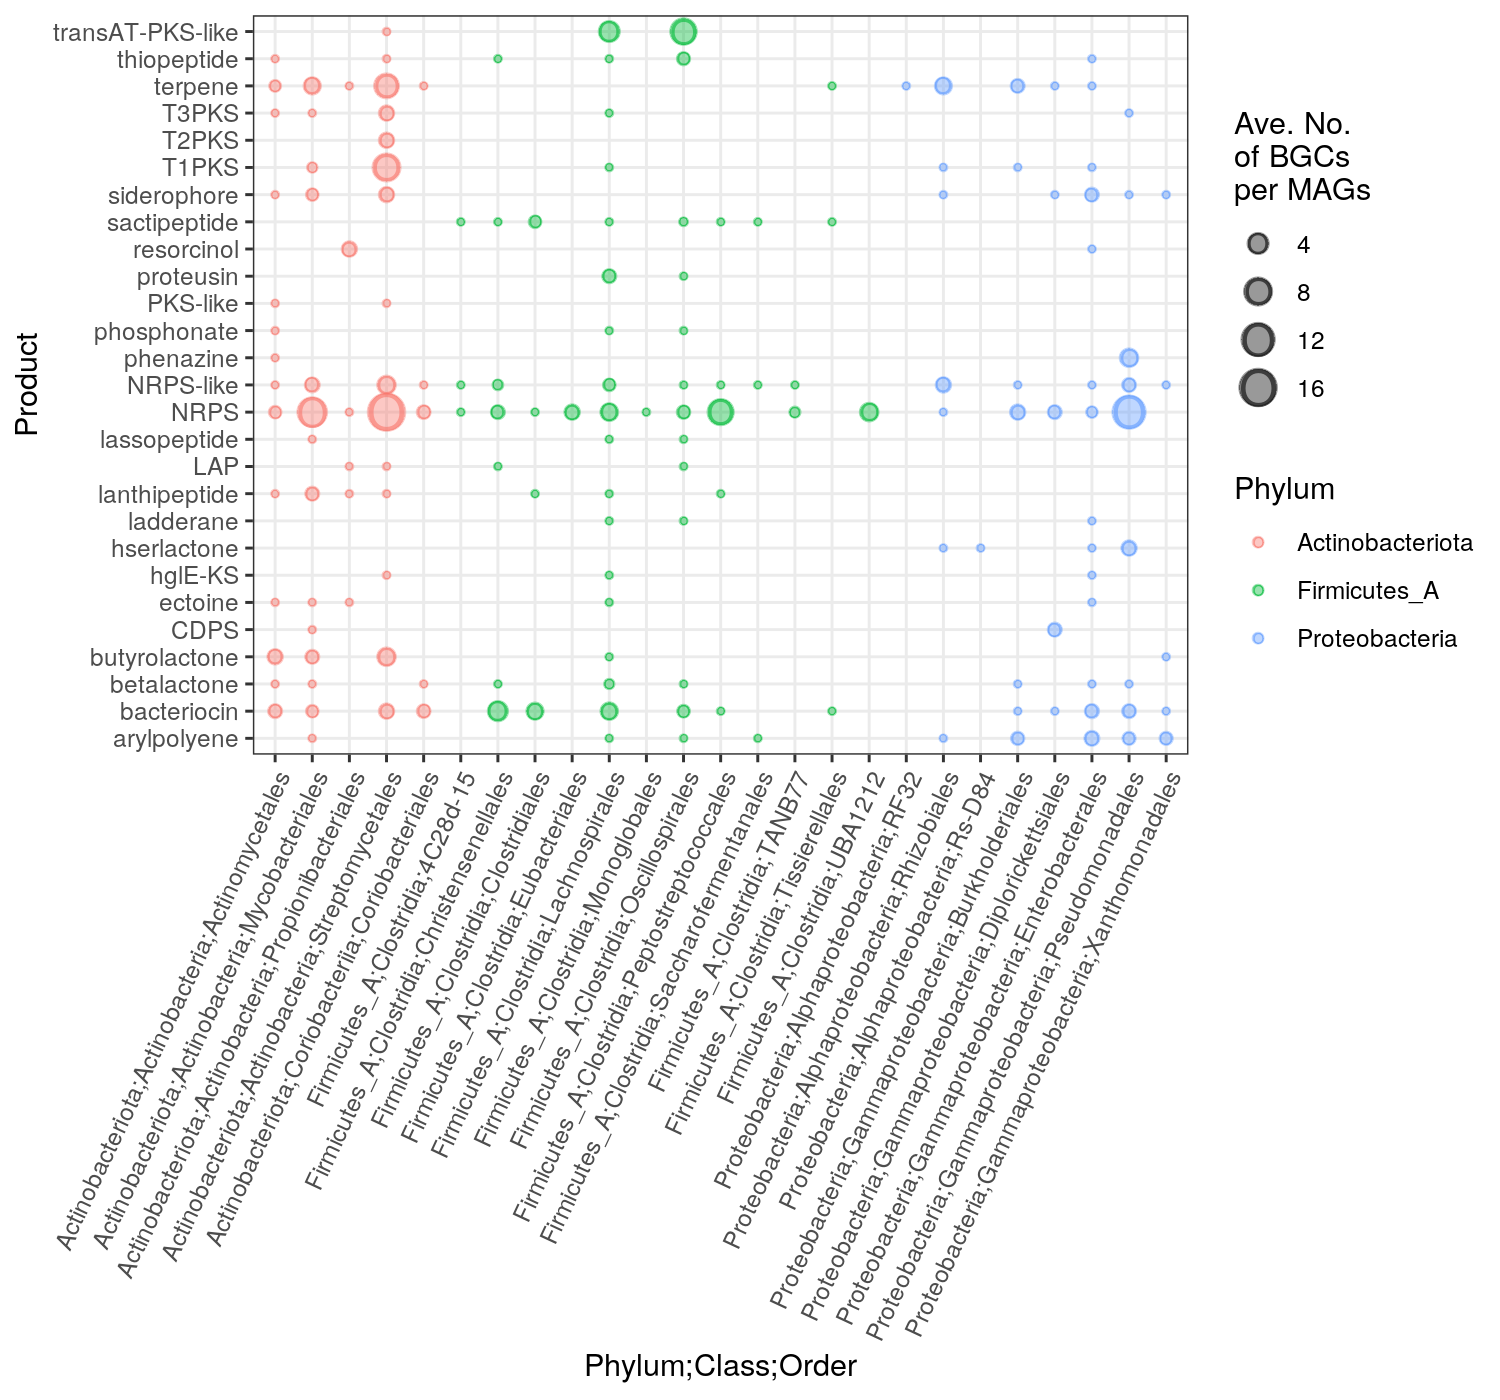

In [23]:
p = products_s_s %>%
    ggplot(aes(Taxonomy, product, size=n_BGCs, color=Phylum)) +
    geom_point(alpha=0.4) +
    geom_point(alpha=0.6, shape='O') +
    scale_size_continuous('Ave. No.\nof BGCs\nper MAGs') +
    labs(x='Phylum;Class;Order', y='Product') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
 
p.dims(7.5,7)
Plot(p)

#### Notes

* tfuA
  * "thiopeptides display nanomolar potency toward various drug-resistant strains of Gram-positive pathogens"
* lassopeptides
  * proteins that act like small molecules
  * promising for drug discovery 
* Ladderane
  * supposedly restricted to annomox bacteria, which are just 5 genera in the Planktomycetes phylum
* CDPS
  * Cyclodipeptides synthase

### Writing table

In [77]:
antismash_outF = file.path(work_dir, 'antismash_v5', 'BGC_product_summary.tsv')
products %>%
    dplyr::select(binID, product, gbk_file) %>%
    rename('genome_ID' = binID) %>%
    write_table(antismash_outF)

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/BGC_product_summary.tsv 


# DeepBGC

In [26]:
D = file.path(work_dir, 'deepBGC')
make_dir(D)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC 


## First run

In [229]:
deepbgc_cmd = function(in_file, out_dir){
    cmd = 'deepbgc pipeline -p meta --output {out_dir} {in_file}'
    cmd = glue::glue(cmd, out_dir=out_dir, in_file=in_file)
    return(cmd)
}

cmds = mapply(deepbgc_cmd, genome_files$fasta_file, genome_files$dBGC_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 1522


[1] "deepbgc pipeline --output /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_002 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa"  
[2] "deepbgc pipeline --output /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__maxbin2_low_prob_006 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa"

In [230]:
resources = list(h_rt = '00:59:00',
                 h_vmem = '4G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [ ]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

## Re-run failed jobs

In [240]:
# directories with output
complete = list.files(file.path(work_dir, 'deepBGC'), '*.bgc.tsv', 
                      full.names=TRUE, recursive=TRUE) %>% dirname %>%
    gsub('/+', '/', .)

# redo genomes
genome_files_f = genome_files %>%
    filter(!dBGC_out_dir %in% complete)

# status
genome_files_f %>% dfhead

[1] 680  61


fasta_file                                                                                                                                                                                    
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.008.contigs.fa
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.015.contigs.fa
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.017.contigs.fa
  base_in                                              
1 artificially_reared_2__metabat2_low_PE.008.contigs.fa
2 artificially_reared_2__metabat2_low_PE.015.contigs.fa
3 artificially_reared_2__metabat2_low_PE.017.contigs.fa
  binID                                             
1 artificially_reared_2__metabat2_low_PE.008.contigs
2 artificially_reared_2__metabat2_low_PE.015.contigs
3 artificially_reared_2__metabat2_low_PE.017.contigs
  taxon                                     
1 artificially_reared_2__metabat2_low_PE_008
2 artificially_reared_2__metabat2_low_PE_015
3 artificially_reared_2__metabat2_low_PE_017
  AS_out_dir                                                                                                                                                                      
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__metabat2_low_PE_008
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__metabat2_low_PE_015
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/artificially_reared_2__metabat2_low_PE_017
  dBGC_out_dir                                                                                                                                                               
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__metabat2_low_PE_008
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__metabat2_low_PE_015
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__metabat2_low_PE_017
  fasta.x                                                                                                                                                                                        
1 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.008.contigs.fa
2 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.015.contigs.fa
3 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.017.contigs.fa
  Marker.lineage               X..genomes X..markers ⋯
1 o__Bacteroidales (UID2657)   160        492        ⋯
2 c__Bacilli (UID285)          586        325        ⋯
3 o__Selenomonadales (UID1024)  64        334        ⋯
  closest_placement_taxonomy                                                                                              
1 N/A                                                                              

In [241]:
cmds = mapply(deepbgc_cmd, genome_files_f$fasta_file, genome_files_f$dBGC_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 680


[1] "deepbgc pipeline --output /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__metabat2_low_PE_008 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.008.contigs.fa"
[2] "deepbgc pipeline --output /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__metabat2_low_PE_015 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__metabat2_low_PE.015.contigs.fa"

In [242]:
resources = list(h_rt = '24:00:00',
                 h_vmem = '7G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [243]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

[1] 680

## Re-run failed jobs

In [244]:
# directories with output
complete = list.files(file.path(work_dir, 'deepBGC'), '*.bgc.tsv', 
                      full.names=TRUE, recursive=TRUE) %>% dirname %>%
    gsub('/+', '/', .)

# redo genomes
genome_files_f = genome_files %>%
    filter(!dBGC_out_dir %in% complete)

# status
genome_files_f %>% dfhead

[1] 470  61


fasta_file                                                                                                                                                                                       
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Belle_p2__metabat2_low_PE.009.contigs.fa                
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Bissell_p1__metabat2_low_PE.001.contigs.fa              
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/C._urophasianus_2_cecum__maxbin2_low_prob.004.contigs.fa
  base_in                                                 
1 Belle_p2__metabat2_low_PE.009.contigs.fa                
2 Bissell_p1__metabat2_low_PE.001.contigs.fa              
3 C._urophasianus_2_cecum__maxbin2_low_prob.004.contigs.fa
  binID                                                
1 Belle_p2__metabat2_low_PE.009.contigs                
2 Bissell_p1__metabat2_low_PE.001.contigs              
3 C._urophasianus_2_cecum__maxbin2_low_prob.004.contigs
  taxon                                        
1 Belle_p2__metabat2_low_PE_009                
2 Bissell_p1__metabat2_low_PE_001              
3 C__urophasianus_2_cecum__maxbin2_low_prob_004
  AS_out_dir                                                                                                                                                                         
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Belle_p2__metabat2_low_PE_009                
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Bissell_p1__metabat2_low_PE_001              
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/C__urophasianus_2_cecum__maxbin2_low_prob_004
  dBGC_out_dir                                                                                                                                                                  
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Belle_p2__metabat2_low_PE_009                
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Bissell_p1__metabat2_low_PE_001              
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/C__urophasianus_2_cecum__maxbin2_low_prob_004
  fasta.x                                                                                                                                                                                           
1 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Belle_p2__metabat2_low_PE.009.contigs.fa                
2 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Bissell_p1__metabat2_low_PE.001.contigs.fa              
3 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/C._urophasianus_2_cecum__maxbin2_low_prob.004.contigs.fa
  Marker.lineage             X..genomes X..markers ⋯
1 p__Bacteroidetes (UID2605) 350        316        ⋯
2 k__Bacteria (UID2372)      131        177        ⋯
3 k__Bacteria (UID2329)      174        149        ⋯
  closest_placement_taxonomy                                                                                                      

In [306]:
cmds = mapply(deepbgc_cmd, genome_files_f$fasta_file, genome_files_f$dBGC_out_dir)
cmds %>% length %>% print
cmds %>% head(n=2)

[1] 470


[1] "deepbgc pipeline --output /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Belle_p2__metabat2_low_PE_009 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Belle_p2__metabat2_low_PE.009.contigs.fa"    
[2] "deepbgc pipeline --output /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Bissell_p1__metabat2_low_PE_001 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Bissell_p1__metabat2_low_PE.001.contigs.fa"

In [307]:
resources = list(h_rt = '36:00:00',
                 h_vmem = '8G',
                 threads = threads,
                 conda.env = 'py3_physeq')     # conda env with batchtools installed
plan(batchtools_sge, resources=resources, workers=workers)

In [308]:
job_ret = future_lapply(as.list(cmds), FUN = function(x) bash_job(x, conda_env=conda_env))
job_ret %>% length

[1] 470

## Re-run failed jobs

In [309]:
# directories with output
complete = list.files(file.path(work_dir, 'deepBGC'), '*.bgc.tsv', 
                      full.names=TRUE, recursive=TRUE) %>% dirname %>%
    gsub('/+', '/', .)

# redo genomes
genome_files_f = genome_files %>%
    filter(!dBGC_out_dir %in% complete)

# status
genome_files_f %>% dfhead

[1] 470  61


fasta_file                                                                                                                                                                                       
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Belle_p2__metabat2_low_PE.009.contigs.fa                
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Bissell_p1__metabat2_low_PE.001.contigs.fa              
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/C._urophasianus_2_cecum__maxbin2_low_prob.004.contigs.fa
  base_in                                                 
1 Belle_p2__metabat2_low_PE.009.contigs.fa                
2 Bissell_p1__metabat2_low_PE.001.contigs.fa              
3 C._urophasianus_2_cecum__maxbin2_low_prob.004.contigs.fa
  binID                                                
1 Belle_p2__metabat2_low_PE.009.contigs                
2 Bissell_p1__metabat2_low_PE.001.contigs              
3 C._urophasianus_2_cecum__maxbin2_low_prob.004.contigs
  taxon                                        
1 Belle_p2__metabat2_low_PE_009                
2 Bissell_p1__metabat2_low_PE_001              
3 C__urophasianus_2_cecum__maxbin2_low_prob_004
  AS_out_dir                                                                                                                                                                         
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Belle_p2__metabat2_low_PE_009                
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/Bissell_p1__metabat2_low_PE_001              
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/antismash_v5/C__urophasianus_2_cecum__maxbin2_low_prob_004
  dBGC_out_dir                                                                                                                                                                  
1 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Belle_p2__metabat2_low_PE_009                
2 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/Bissell_p1__metabat2_low_PE_001              
3 /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/C__urophasianus_2_cecum__maxbin2_low_prob_004
  fasta.x                                                                                                                                                                                           
1 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Belle_p2__metabat2_low_PE.009.contigs.fa                
2 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/Bissell_p1__metabat2_low_PE.001.contigs.fa              
3 /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/C._urophasianus_2_cecum__maxbin2_low_prob.004.contigs.fa
  Marker.lineage             X..genomes X..markers ⋯
1 p__Bacteroidetes (UID2605) 350        316        ⋯
2 k__Bacteria (UID2372)      131        177        ⋯
3 k__Bacteria (UID2329)      174        149        ⋯
  closest_placement_taxonomy                                                                                                      

#### Notes

* The failed jobs are due to short contigs

## Summary

### Load

In [27]:
dBGC_files = list.files(file.path(work_dir, 'deepBGC'), '*.bgc.tsv', recursive=TRUE, full.names=TRUE)
dBGC_files %>% length %>% print
dBGC_files %>% head(n=2)

[1] 1052


[1] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_1__metabat2_low_PE_002/artificially_reared_1__metabat2_low_PE_002.bgc.tsv"  
[2] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/BGCs/deepBGC/artificially_reared_2__maxbin2_low_prob_006/artificially_reared_2__maxbin2_low_prob_006.bgc.tsv"

In [28]:
read_dBGC = function(x){
    y = read.delim(x)
    y$taxon = gsub('\\.bgc\\.tsv', '', basename(x))
    return(y)
}

dBGC = lapply(as.list(dBGC_files), read_dBGC) %>%
    do.call(rbind, .) %>%
    dplyr::select(-protein_ids, -pfam_ids, bio_pfam_ids) %>%
    mutate(deepbgc_score = deepbgc_score %>% as.Num)

dBGC %>% dfhead

[1] 6520   27


sequence_id                           detector detector_version
1 artificially_reared_1__coassemble_222 deepbgc  0.1.0           
2 artificially_reared_1__coassemble_231 deepbgc  0.1.0           
3 artificially_reared_2__coassemble_33  deepbgc  0.1.0           
  detector_label bgc_candidate_id                                    nucl_start
1 deepbgc        artificially_reared_1__coassemble_222_62922-72386.1 62922     
2 deepbgc        artificially_reared_1__coassemble_231_45-14694.1       45     
3 deepbgc        artificially_reared_2__coassemble_33_32985-43115.1  32985     
  nucl_end nucl_length num_proteins num_domains ⋯ product_class Alkaloid NRP 
1 72386     9464        6            9          ⋯               0.00     0.08
2 14694    14649       17           25          ⋯ Saccharide    0.00     0.02
3 43115    10130       14           33          ⋯ Saccharide    0.03     0.07
  Other Polyketide RiPP Saccharide Terpene
1 0.05  0.32       0.21 0.07       0.32   
2 0.06  0.00       0.00 0.92       0.00   
3 0.11  0.12       0.01 0.68       0.01   
  bio_pfam_ids                                           
1                                                        
2 PF00534;PF01943;PF00535;PF00171                        
3 PF00535;PF01370;PF02719;PF01943;PF04321;PF01118;PF07993
  taxon                                      
1 artificially_reared_1__metabat2_low_PE_002 
2 artificially_reared_1__metabat2_low_PE_002 
3 artificially_reared_2__maxbin2_low_prob_006

In [29]:
# joining with metadata
dBGC = dBGC %>%
    inner_join(genome_files, c('taxon')) 

dBGC %>% dfhead

[1] 6520   87


sequence_id                           detector detector_version
1 artificially_reared_1__coassemble_222 deepbgc  0.1.0           
2 artificially_reared_1__coassemble_231 deepbgc  0.1.0           
3 artificially_reared_2__coassemble_33  deepbgc  0.1.0           
  detector_label bgc_candidate_id                                    nucl_start
1 deepbgc        artificially_reared_1__coassemble_222_62922-72386.1 62922     
2 deepbgc        artificially_reared_1__coassemble_231_45-14694.1       45     
3 deepbgc        artificially_reared_2__coassemble_33_32985-43115.1  32985     
  nucl_end nucl_length num_proteins num_domains ⋯
1 72386     9464        6            9          ⋯
2 14694    14649       17           25          ⋯
3 43115    10130       14           33          ⋯
  closest_placement_taxonomy                                                                                                 
1 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445
2 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445
3 N/A                                                                                                                        
  closest_placement_ani closest_placement_af
1 85.72                 0.61                
2 85.72                 0.61                
3 N/A                   N/A                 
  pplacer_taxonomy                                                                                  
1 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__
2 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__
3 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__          
  classification_method note                                              
1 Placement             taxonomic classification fully defined by topology
2 Placement             taxonomic classification fully defined by topology
3 Placement             taxonomic classification fully defined by topology
  aa_percent translation_table red_value      warnings
1 93.33      11                0.985595897806 N/A     
2 93.33      11                0.985595897806 N/A     
3 90.20      11                0.836955988283 N/A

### Stats

In [30]:
# number of putative BGCS
for(x in c(0.5, 0.6, 0.7, 0.8, 0.9)){
    n_BGCs = dBGC %>%
        filter(deepbgc_score >= x) %>%
        .$bgc_candidate_id %>% unique %>% length

    cat(glue::glue('Number of BGCs (score >= {score}):', score=x), 
        n_BGCs, '\n')
}

Number of BGCs (score >= 0.5): 6520 
Number of BGCs (score >= 0.6): 3843 
Number of BGCs (score >= 0.7): 2330 
Number of BGCs (score >= 0.8): 1433 
Number of BGCs (score >= 0.9): 649 


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/a7dbcc811f181729dd5515927fae38b4.RDS 


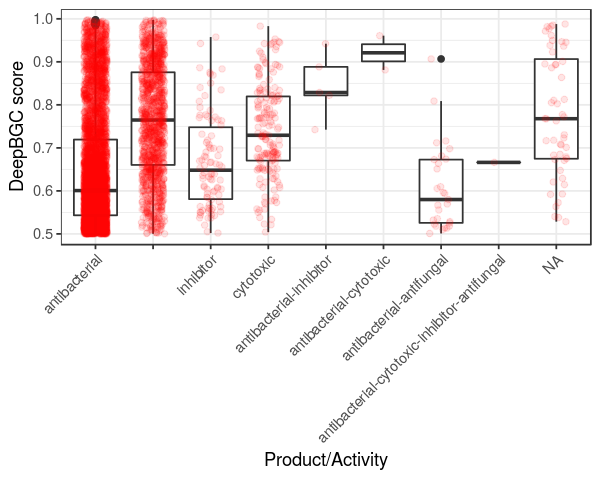

In [31]:
# deepBGC scores
p = dBGC %>%
    dplyr::select(taxon, nucl_length, deepbgc_score, product_activity) %>%
    ggplot(aes(product_activity, deepbgc_score)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.2, alpha=0.1, color='red') +
    labs(x='Product/Activity', y='DeepBGC score') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1) 
    )

dims(5,4)
Plot(p)

In [32]:
# Taxonomy formatting
dBGC_s = dBGC %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') 

dBGC_s %>% dfhead

[1] 6520   86


sequence_id                           detector detector_version
1 artificially_reared_1__coassemble_222 deepbgc  0.1.0           
2 artificially_reared_1__coassemble_231 deepbgc  0.1.0           
3 artificially_reared_2__coassemble_33  deepbgc  0.1.0           
  detector_label bgc_candidate_id                                    nucl_start
1 deepbgc        artificially_reared_1__coassemble_222_62922-72386.1 62922     
2 deepbgc        artificially_reared_1__coassemble_231_45-14694.1       45     
3 deepbgc        artificially_reared_2__coassemble_33_32985-43115.1  32985     
  nucl_end nucl_length num_proteins num_domains ⋯
1 72386     9464        6            9          ⋯
2 14694    14649       17           25          ⋯
3 43115    10130       14           33          ⋯
  closest_placement_taxonomy                                                                                                 
1 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445
2 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445
3 N/A                                                                                                                        
  closest_placement_ani closest_placement_af
1 85.72                 0.61                
2 85.72                 0.61                
3 N/A                   N/A                 
  pplacer_taxonomy                                                                                  
1 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__
2 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__
3 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__          
  classification_method note                                              
1 Placement             taxonomic classification fully defined by topology
2 Placement             taxonomic classification fully defined by topology
3 Placement             taxonomic classification fully defined by topology
  aa_percent translation_table red_value      warnings
1 93.33      11                0.985595897806 N/A     
2 93.33      11                0.985595897806 N/A     
3 90.20      11                0.836955988283 N/A

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/4725985fe219d121baba7dc2007efe9d.RDS 


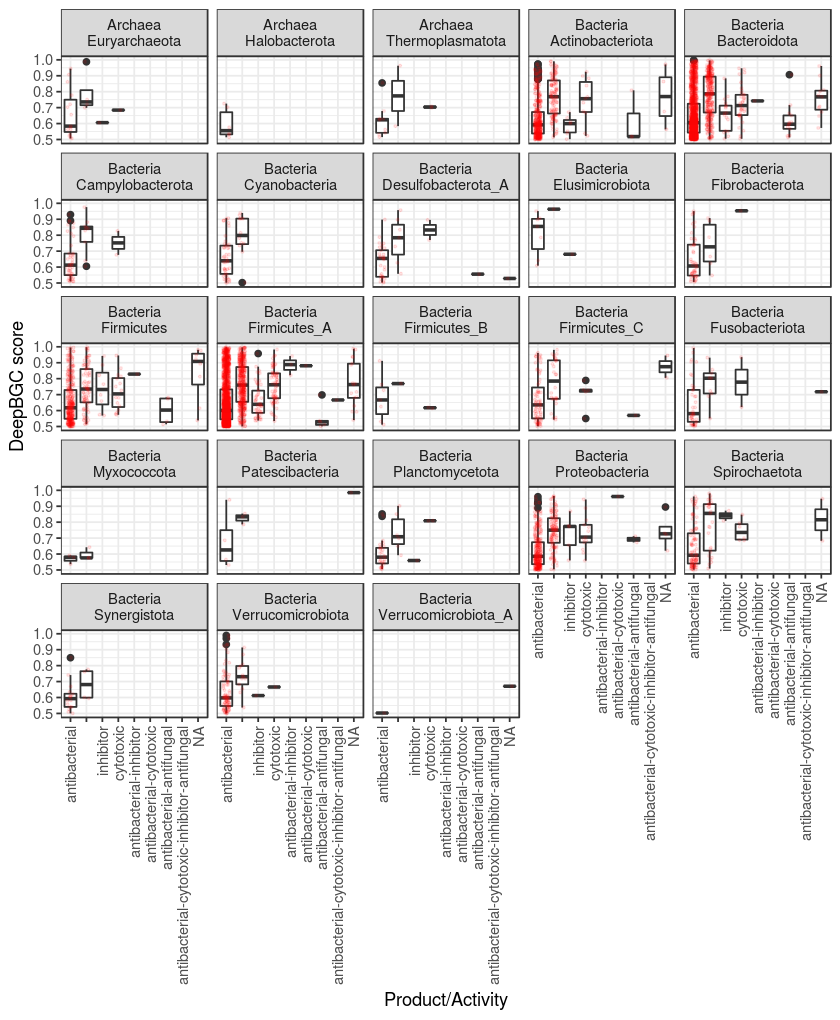

In [33]:
# by taxonomy
p = dBGC_s %>%
    mutate(Taxonomy = gsub(';', '\n', Taxonomy)) %>%
    dplyr::select(Taxonomy, nucl_length, deepbgc_score, product_activity) %>%
    ggplot(aes(product_activity, deepbgc_score)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.2, alpha=0.1, color='red', size=0.5) +
    labs(x='Product/Activity', y='DeepBGC score') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5) 
    )

dims(7,8.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/77802321d18f9c8f756fd3d626651041.RDS 


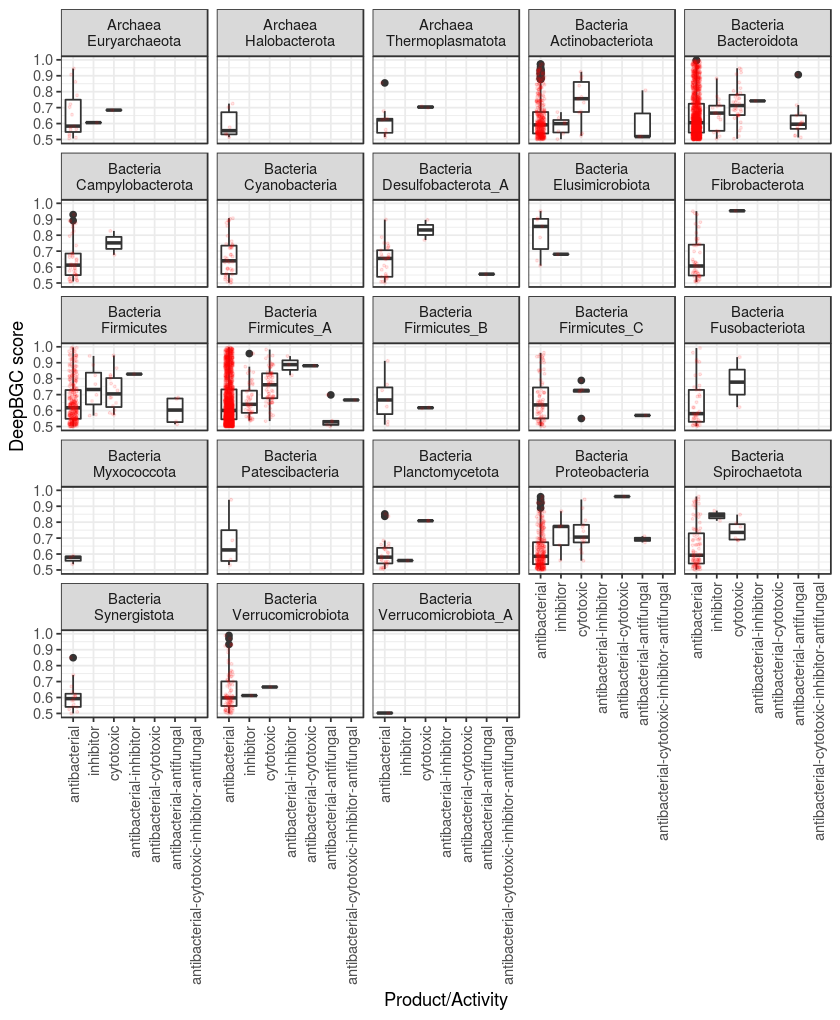

In [34]:
# by taxonomy
p = dBGC_s %>%
    mutate(Taxonomy = gsub(';', '\n', Taxonomy)) %>%
    dplyr::select(Taxonomy, nucl_length, deepbgc_score, product_activity) %>%
    filter(product_activity != '') %>%
    ggplot(aes(product_activity, deepbgc_score)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.2, alpha=0.1, color='red', size=0.5) +
    labs(x='Product/Activity', y='DeepBGC score') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5) 
    )

dims(7,8.5)
Plot(p)

### RF scores for each product

In [35]:
dBGC_s = dBGC %>%
    dplyr::select(bgc_candidate_id, Domain, Phylum, Class, Order, Family, Genus,
                  taxon, nucl_length, deepbgc_score, antibacterial, 
                  cytotoxic, inhibitor, antifungal, product_class, 
                  Alkaloid, NRP, Other, Polyketide, RiPP, Saccharide, Terpene) %>%
    gather(BGC_type, BGC_type_score, -taxon, -nucl_length, -deepbgc_score,
           -Domain, -Phylum, -Class, -Order, -Family, -Genus, -bgc_candidate_id) %>%
    mutate(BGC_type_score = BGC_type_score %>% as.Num) %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';') 
dBGC_s %>% dfhead

Warning message:
“attributes are not identical across measure variables;
they will be dropped”Warning message in as.Num(.):
“NAs introduced by coercion”

[1] 78240    11


bgc_candidate_id                                    Taxonomy             
1 artificially_reared_1__coassemble_222_62922-72386.1 Bacteria;Bacteroidota
2 artificially_reared_1__coassemble_231_45-14694.1    Bacteria;Bacteroidota
3 artificially_reared_2__coassemble_33_32985-43115.1  Bacteria;Bacteroidota
  Class          Order            Family               Genus           
1 c__Bacteroidia o__Bacteroidales f__Bacteroidaceae    g__Bacteroides_A
2 c__Bacteroidia o__Bacteroidales f__Bacteroidaceae    g__Bacteroides_A
3 c__Bacteroidia o__Bacteroidales f__Paludibacteraceae g__             
  taxon                                       nucl_length deepbgc_score
1 artificially_reared_1__metabat2_low_PE_002   9464       0.76720      
2 artificially_reared_1__metabat2_low_PE_002  14649       0.77343      
3 artificially_reared_2__maxbin2_low_prob_006 10130       0.78591      
  BGC_type      BGC_type_score
1 antibacterial 0.85          
2 antibacterial 0.68          
3 antibacterial 0.49

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/d6ba37e736163a0ea3399083813ea631.RDS 


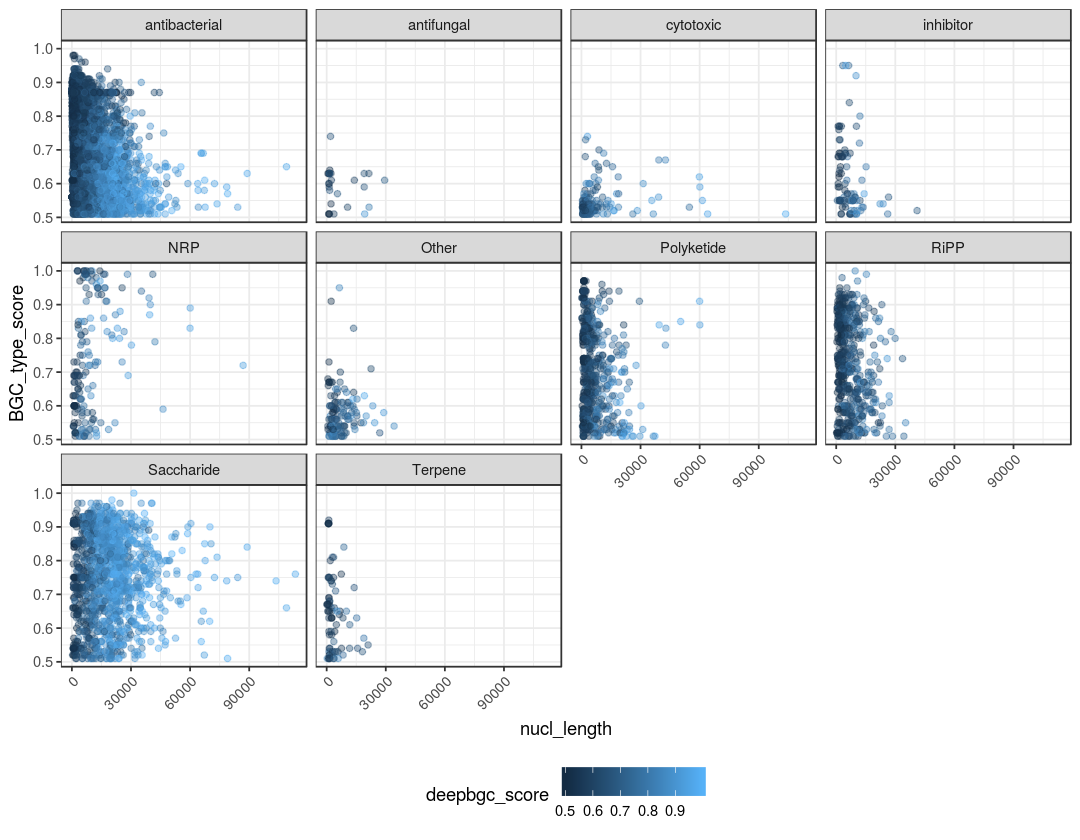

In [36]:
p = dBGC_s %>%
    filter(BGC_type_score > 0.5) %>%
    ggplot(aes(nucl_length, BGC_type_score, color=deepbgc_score)) +
    geom_point(alpha=0.4) +
    facet_wrap(~ BGC_type) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1),
        legend.position = 'bottom'
    )

dims(9,7)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/f0833f0ce7a03e9432b5ab241713f94f.RDS 


Warning message:
“Removed 6520 rows containing non-finite values (stat_boxplot).”

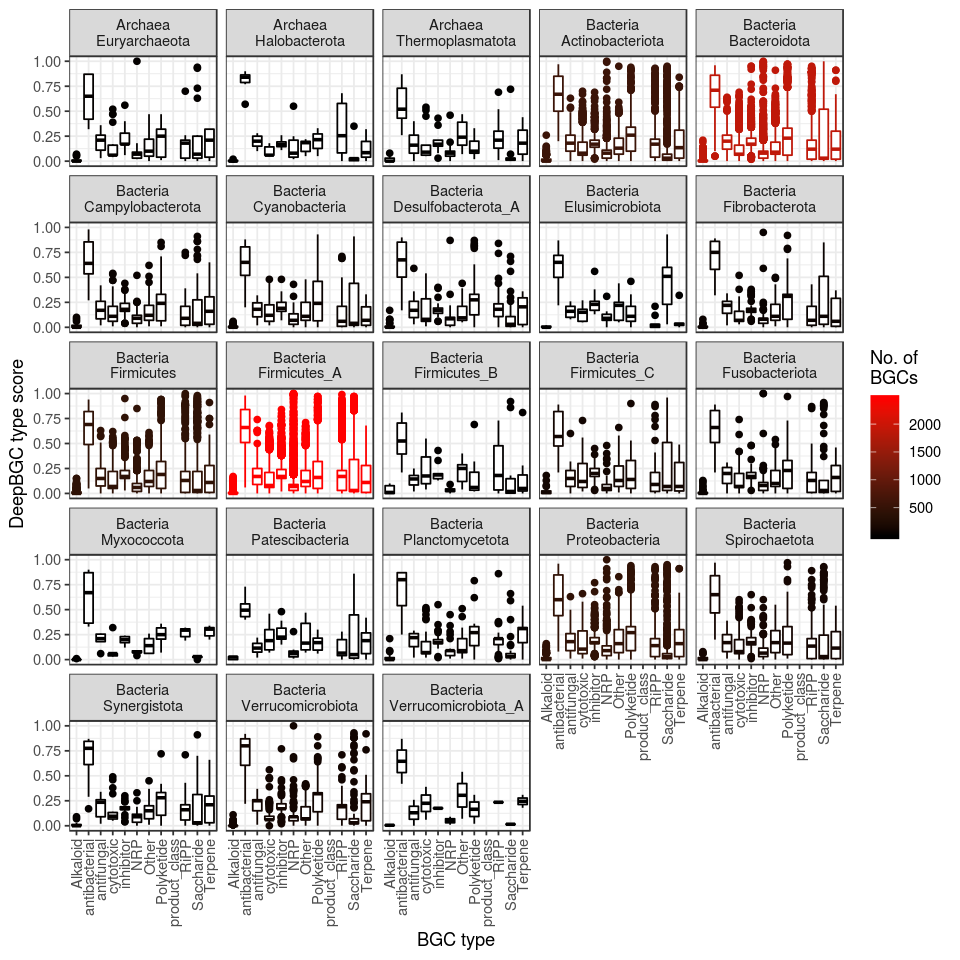

In [39]:
# by taxonomy
p = dBGC_s %>%
    mutate(Taxonomy = gsub(';', '\n', Taxonomy)) %>%
    group_by(Taxonomy, BGC_type) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    ggplot(aes(BGC_type, BGC_type_score, color=n)) +
    geom_boxplot() +
    scale_color_continuous('No. of\nBGCs', low='black', high='red') +
    labs(x='BGC type', y='DeepBGC type score') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5) 
    )

dims(8,8)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/f31db06e0adf3b42fa4e68bdcdb1da14.RDS 


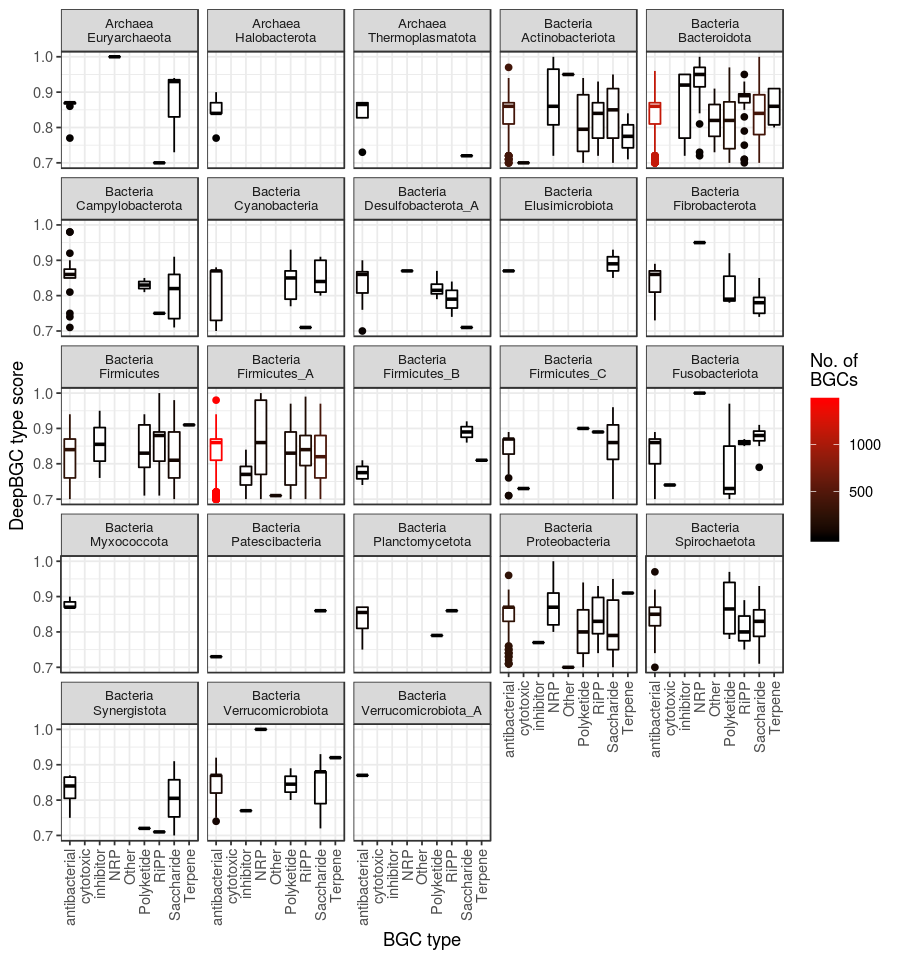

In [38]:
# by taxonomy; stringent
p = dBGC_s %>%
    filter(deepbgc_score >= 0.5) %>%
    mutate(Taxonomy = gsub(';', '\n', Taxonomy)) %>%
    group_by(Taxonomy, bgc_candidate_id) %>%
    mutate(max_BGC_type_score = max(BGC_type_score, na.rm=TRUE)) %>%
    ungroup() %>%
    filter(BGC_type_score == max_BGC_type_score) %>%
    group_by(Taxonomy, BGC_type) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(BGC_type_score >= 0.7) %>%
    ggplot(aes(BGC_type, BGC_type_score, color=n)) +
    geom_boxplot() +
    scale_color_continuous('No. of\nBGCs', low='black', high='red') +
    labs(x='BGC type', y='DeepBGC type score') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        strip.text = element_text(size=8),
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5) 
    )

dims(7.5,8)
Plot(p)

# sessionInfo

In [281]:
condaInfo(conda_env)

# packages in environment at /ebio/abt3_projects/software/miniconda3_gt4.4/envs/BGC:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_tflow_select             2.3.0                       mkl  
absl-py                   0.8.0                    py37_0    conda-forge
alsa-lib                  1.1.5             h516909a_1001    conda-forge
antismash                 5.0.0                    pypi_0    pypi
appdirs                   1.4.3                      py_1    conda-forge
astor                     0.7.1                      py_0    conda-forge
bcbio-gff                 0.6.6                      py_0    bioconda
biopython                 1.74             py37h516909a_0    conda-forge
blast                     2.2.31                        1    bioconda
boost                     1.70.0           py37h9de70de_1    conda-forge
boost-cpp                 1.70.0               h8e57a91_2    conda-forge
bx-python

In [282]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] bindrcpp_0.2.2          future.apply_1.0.0      future.batchtools_0.7.1
 [4] future_1.9.0            doParallel_1.0.11       iterators_1.0.10       
 [7] foreach_1.4.4           data.table_1.11.4       ggplot2_3.0.0          
[10] tidyr_0.8.1             dplyr_0.7.6            

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-2      progress_1.2.0    tidyselect_0.2.4  repr_0.15.0      
 [5] purrr_0.2.4       listenv_0.7.0     colorspace_1.3-2  htmltools_0.3.6  
 [9] base64enc_0.1-3   rlang_0.2.1       p